# **Análisis Exploratorio de Datos**

#### En el que se analizan 4 datasets de 3 plataformas de MOOCS (Coursera, EDX y Udemy) para determinar que variables influyen a la hora de decidir pagar un curso, tomando cómo referencia: precio, idioma, nivel y rating

In [1]:
#IMPORTAR LIBRERÍAS A UTILIZAR PARA EL ANÁLISIS EXPLORATORIO DE DATOS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud, STOPWORDS

## IMPORTANTE!
Descargar los datasets del siguiente link, y colocarlos en carpeta a la altura de este archivo para poder ejecutar el código:

- `LINK`: "https://drive.google.com/drive/folders/1IjRATq1wicMevJ7epbJzlkZ3spMPRil2?usp=sharing"

In [2]:
#IMPORTAR DATAFRAMES PARA COMENZAR A EXPLORARLOS
coursera_cursos = pd.read_csv('Datasets_PI_02\Coursera_courses.csv')
coursera_reviews = pd.read_csv('Datasets_PI_02\Coursera_reviews.csv')
edx_cursos = pd.read_csv('Datasets_PI_02\edx_courses.csv')
udemy_cursos = pd.read_csv(r'Datasets_PI_02\udemy_courses.csv')

## VISUALIZAMOS EL DATASET DE CURSOS DE COUSERA

In [3]:
#VISUALIZACIÓN
coursera_cursos.sample(5)

,name,institution,course_url,course_id
10,Crash Course on Python,Google,https://www.coursera.org/learn/python-crash-co...,python-crash-course
299,Autodesk Certified Professional: Revit for Arc...,Autodesk,https://www.coursera.org/learn/autodesk-revit-...,autodesk-revit-architectural-design
72,An Introduction to American Law,University of Pennsylvania,https://www.coursera.org/learn/american-law,american-law
600,Getting Started with Essay Writing,"University of California, Irvine",https://www.coursera.org/learn/getting-started...,getting-started-with-essay-writing
554,Effective Business Presentations with Powerpoint,PwC,https://www.coursera.org/learn/powerpoint-pres...,powerpoint-presentations


- Revisión de Valores Nulos

<Axes: >

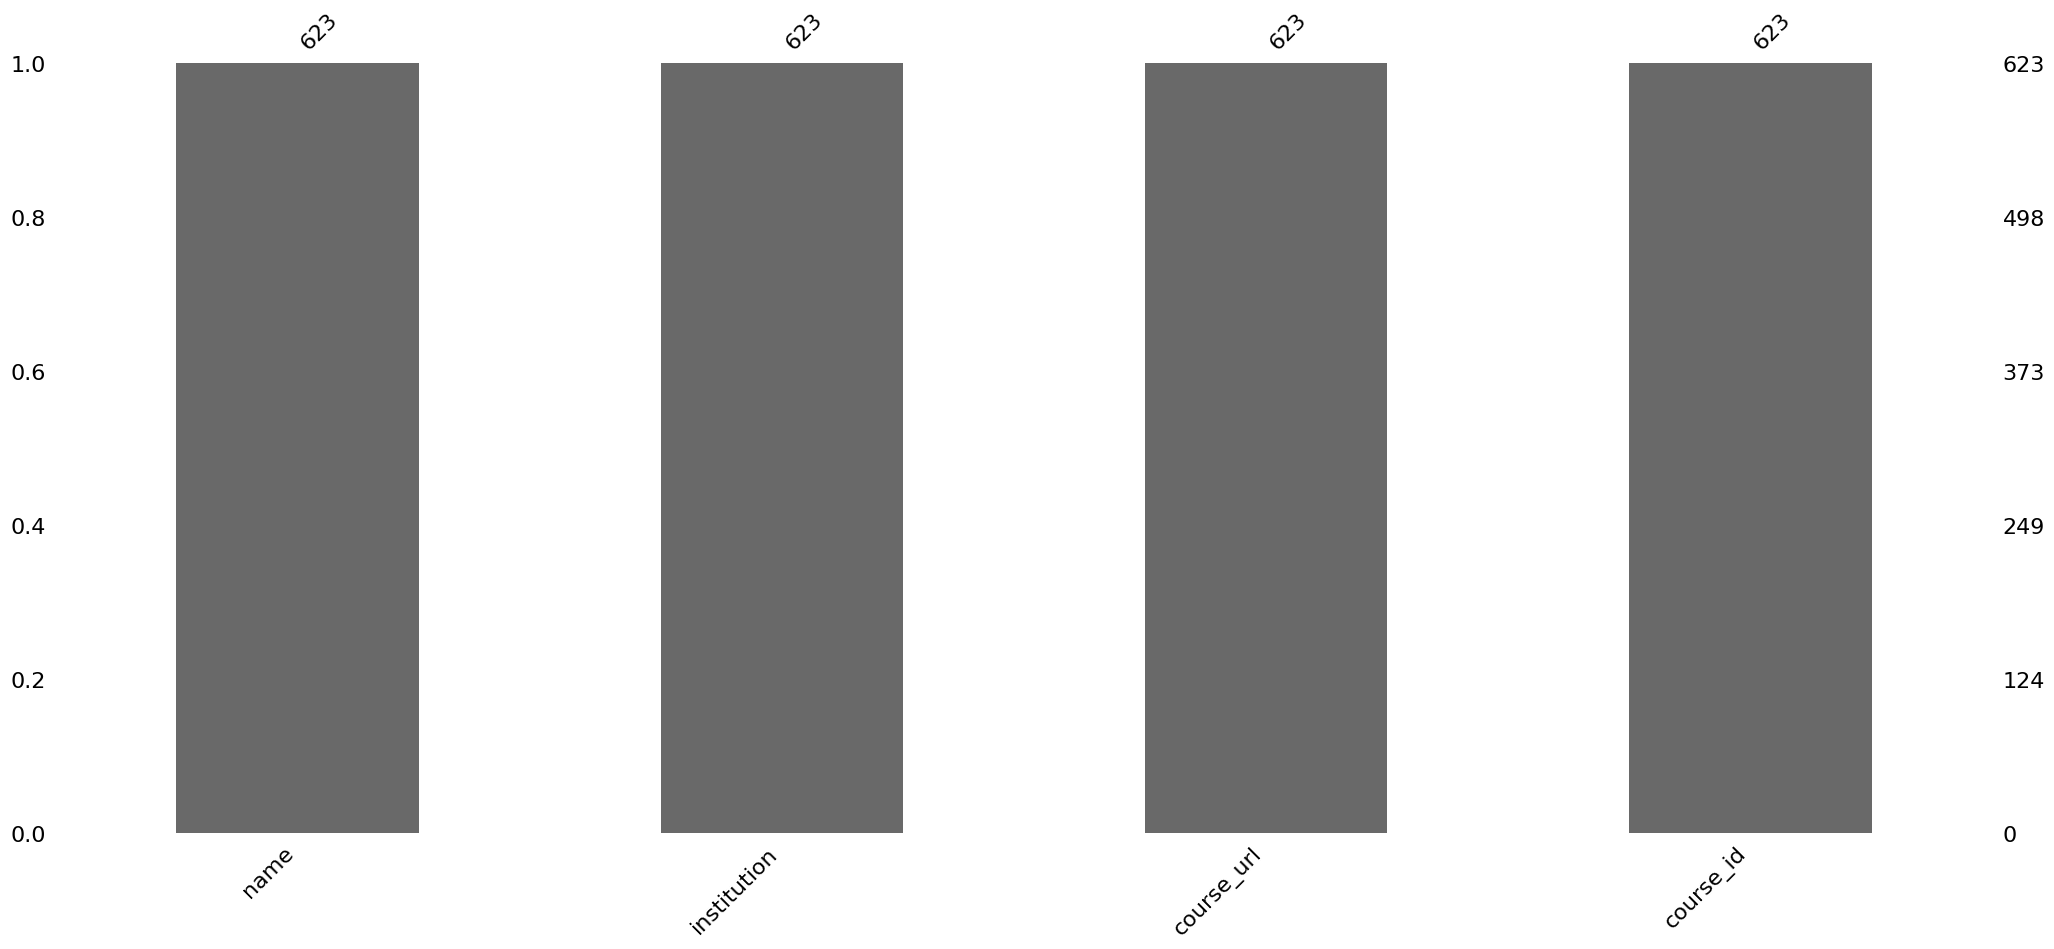

In [74]:
msno.bar(coursera_cursos)

- Tipo de Dato 

In [75]:
coursera_cursos.dtypes

name           object
institution    object
course_url     object
course_id      object
dtype: object

- Checar si hay valores duplicados para la columna 'course_id'

In [76]:
coursera_cursos.course_id.duplicated().sum()

0

- Eliminar la columna que no nos sirve para el análisis 

In [77]:
coursera_cursos.drop(['course_url'], axis=1, inplace=True)

- Quitar espacios en blanco 

In [78]:
coursera_cursos['institution'] = coursera_cursos['institution'].str.strip(' ')

In [79]:
coursera_cursos.sample(5)

,name,institution,course_id
3,Technical Support Fundamentals,Google,technical-support-fundamentals
604,Tricky American English Pronunciation,"University of California, Irvine",tricky-american-english-pronunciation
137,Machine Learning with Python,IBM,machine-learning-with-python
183,Financial Accounting Fundamentals,University of Virginia,uva-darden-financial-accounting
607,"Competencias Laborales: Perfiles, Evaluación y...",Universidad de Chile,competencias-lab


Se observan: 
- 1 variable categórica
- 2 Texto

#### ANÁLISIS VARIADO Y MULTIVARIADO

*** Gráfico de barras para institución, se considera únicamente el top 

In [80]:
institution_top = coursera_cursos.institution.value_counts().head(20)
institution_top

University of Pennsylvania                    43
University of Michigan                        31
Duke University                               24
Google Cloud                                  22
IBM                                           18
Stanford University                           18
University of Illinois at Urbana-Champaign    17
University of Virginia                        17
Yale University                               17
DeepLearning.AI                               16
University of California, Irvine              15
Johns Hopkins University                      14
University of California, Davis               13
University of London                          12
Universiteit Leiden                           11
University of Colorado Boulder                10
University of California San Diego            10
Google                                         9
The University of Edinburgh                    8
University of Toronto                          8
Name: institution, d

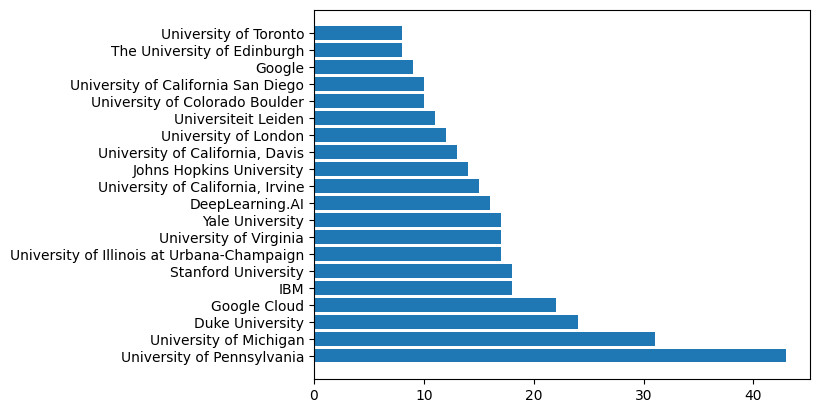

In [81]:
plt.barh(institution_top.index, institution_top)
plt.show()

*** Nubes de palabras

-Para la columna 'course_id'

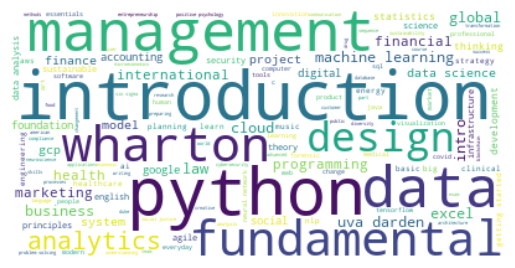

In [82]:
text = " ".join(review for review in coursera_cursos.course_id)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

-Ahora veamos que palabras se repiten más en la columna 'name'

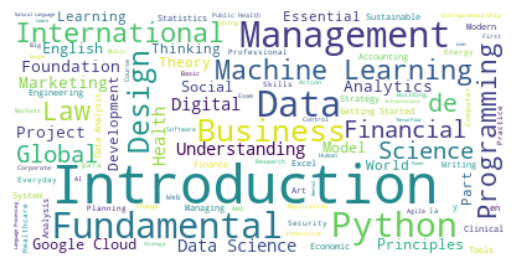

In [83]:
text = " ".join(review for review in coursera_cursos.name)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words = 100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### OBSERVACIONES:

De las conclusiones más importantes que podemos adquirir del análisis de este dataset es que el nivel de los cursos de las instituciones que comparten en Coursera es INTRODUCCIÓN o FUNDAMENTOS y están más enfocados al área de la programación, siendo Python una de los principales programas a aprender, debido al auge que está teniendo últimamente por la facilidad que otorga para aprender su lenguaje. 


* Guardando el archivo con los datos limpios en csv 

In [84]:
#Preparando los datos para csv
coursera_cursos.to_csv('emp_coursera_courses.csv', index=False, encoding='utf-8')

## VISUALIZAMOS EL DATASET DE RESEÑAS DE COUSERA

In [85]:
coursera_reviews.sample(5)

,reviews,reviewers,date_reviews,rating,course_id
1071243,An amazing learning experience. The course ins...,By Mohammed T,"May 21, 2020",5,mindshift
695705,This was a great course that has helped me fee...,By Jeremy R,"Sep 22, 2018",4,html
532222,I learned so much from this course. Thanks to ...,By Nick,"Mar 06, 2016",5,american-law
77317,"This is an excellent non-technical, high-level...",By Fayez A,"Aug 27, 2020",5,ai-for-everyone
1436940,A great fundamental course for getting into IT...,By Kyle A,"Apr 22, 2020",5,technical-support-fundamentals


- Revisión de valores nulos

<Axes: >

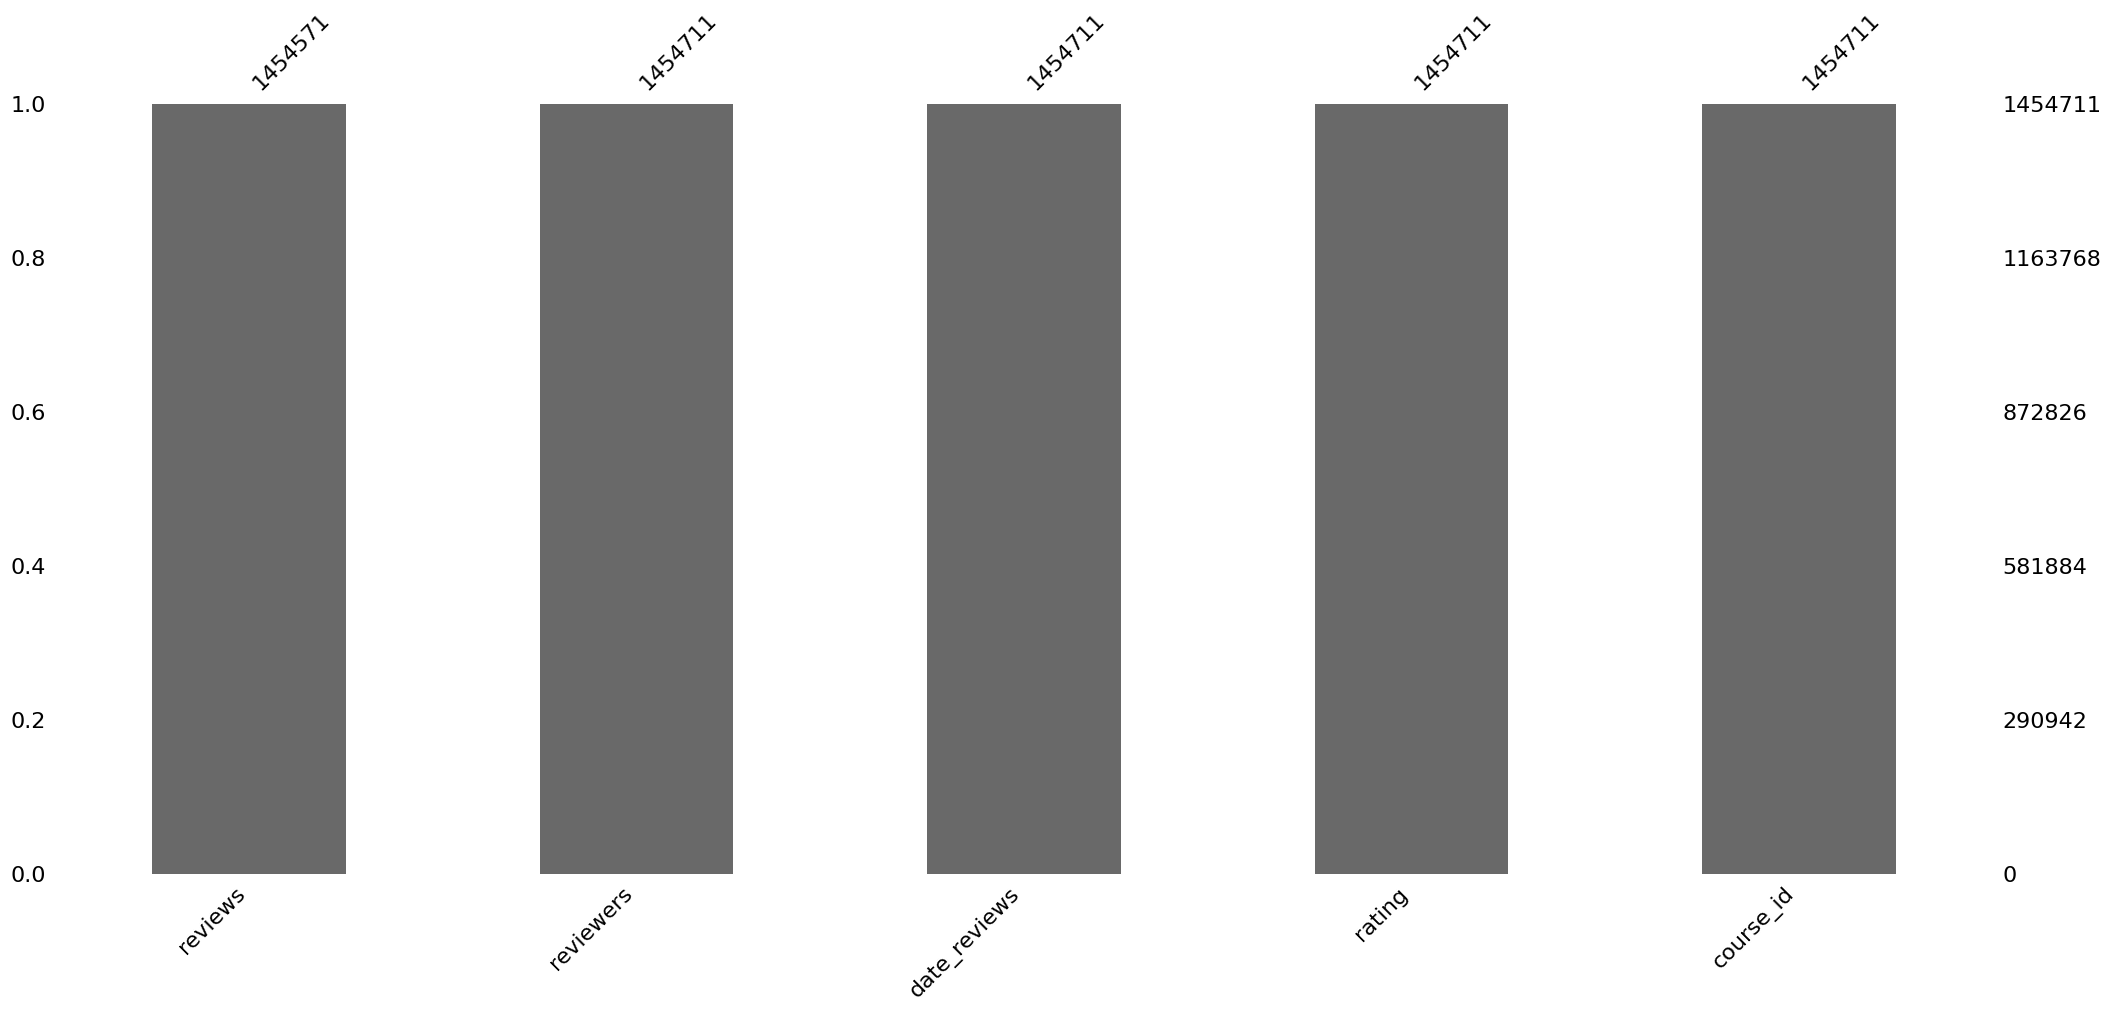

In [86]:
msno.bar(coursera_reviews)

- Tipo de Dato

In [87]:
coursera_reviews.dtypes

reviews         object
reviewers       object
date_reviews    object
rating           int64
course_id       object
dtype: object

- Cambio de tipo de dato para la columna 'date_reviews'

In [88]:
coursera_reviews['date_reviews'] = pd.to_datetime(coursera_reviews['date_reviews'], errors='coerce')

In [89]:
#Revisando en que periodo se hicieron las reseñas
coursera_reviews.date_reviews.describe()

C:\Users\nanci\AppData\Local\Temp\ipykernel_13828\331415853.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  coursera_reviews.date_reviews.describe()


count                 1454711
unique                   1892
top       2020-05-25 00:00:00
freq                     5394
first     2015-08-07 00:00:00
last      2020-10-10 00:00:00
Name: date_reviews, dtype: object

- Revisando la columna 'reviews'

In [90]:
palabra = coursera_reviews['reviews'].str.len()
mask = coursera_reviews[palabra < 3]
mask

,reviews,reviewers,date_reviews,rating,course_id
173,.,By Bandhanwar A D,2020-07-09,1,financial-markets-global
190,-,By Kshitija,2020-05-21,2,financial-markets-global
207,-,By Kshitija,2020-05-21,2,financial-markets-global
224,-,By Kshitija,2020-05-21,2,financial-markets-global
1174,.,By Felipe N d A,2020-06-11,4,financial-markets-global
...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking
1454708,.,By Drishti D,2020-06-20,5,computer-networking
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking


In [91]:
#Se observan reseñas sin importancia procedo a eliminarlas
mask = coursera_reviews[palabra < 3].index #Se agrega .index para después borrar
coursera_reviews.drop(index=mask, inplace=True)
coursera_reviews.shape

(1448196, 5)

- Eliminando duplicados

In [92]:
coursera_reviews.duplicated().sum()

930850

In [93]:
coursera_reviews.drop_duplicates(inplace=True)
coursera_reviews.shape

(517346, 5)

- Eliminar columnas que no son necesarias para el análisis posterior

In [94]:
coursera_reviews.drop(['reviewers'], axis=1, inplace=True)

* Se agrega columna año, para facilitar el análisis posteriormente

In [95]:
#SE AGREGA COLUMNA RELEASE_YEAR
coursera_reviews['year_reviews'] = coursera_reviews['date_reviews'].dt.year

In [96]:
coursera_reviews.sample(5)

,reviews,date_reviews,rating,course_id,year_reviews
1321923,It is a very awesome and difficult course,2020-05-08,5,strategic-business-management-microeconomics,2020
1122557,It is very great course to add more knowledge ...,2019-01-07,5,version-control-with-git,2019
169278,"A lot of theory, and mostly focused on busines...",2020-07-11,3,negotiation-skills,2020
432669,Really good content.,2020-05-01,5,uva-darden-market-analytics,2020
20836,Good for people new to both python and program...,2017-11-26,4,python,2017


Se Observan: 
* 1 variable categórica
* 1 variable numérica
* 2 Texto

#### ANÁLISIS VARIADO Y MULTIVARIADO

*** Variable categórica

<Axes: xlabel='rating', ylabel='count'>

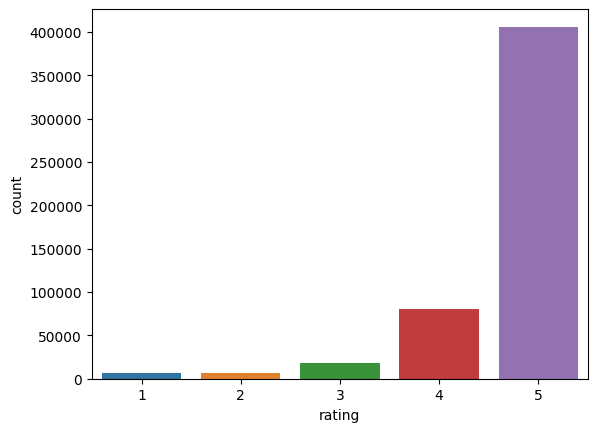

In [97]:
sns.countplot(x='rating', data= coursera_reviews)

**Observaciones**

Se observa una tendencia clara de satisfacción de las personas que toman el curso, habrá que analizar más adelante, cuáles son las razones porque una persona no se siente satisfecho.

*** Variable numérica

<Axes: xlabel='year_reviews', ylabel='count'>

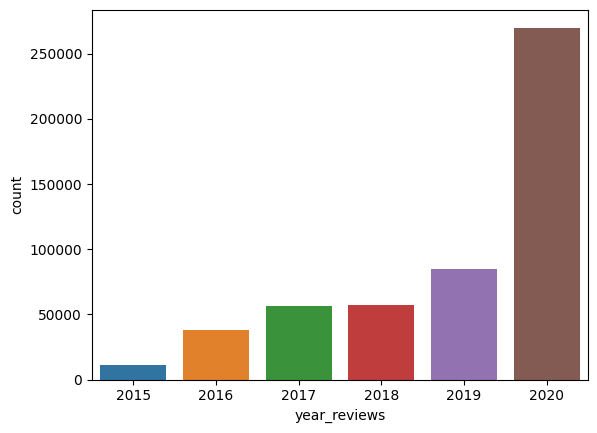

In [98]:
sns.countplot(x='year_reviews', data= coursera_reviews)

Observaciones: 

- Una tendencia a la alza a través de los años, en el que se ve claramente cómo ciertos factores que ocurrieron impulsaron las reseñas, esto también se puede deducir que a más reseñas, más inscritos.

**NUBE DE PALABRAS**

##### Comenzamos a analizar las palabras que más se repiten en los comentarios con rating 5

In [99]:
mask_rating5 = coursera_reviews[coursera_reviews.rating == 5].reset_index(drop=True)
mask_rating5.sample(5)

,reviews,date_reviews,rating,course_id,year_reviews
202694,Good course with spot-on explanation for begin...,2020-03-04,5,machine-learning-with-python,2020
32993,It's a excellent course to enter the AI deep l...,2020-06-02,5,neural-networks-deep-learning,2020
48862,"I really enjoyed this excellent course, I lear...",2017-06-18,5,uva-darden-project-management,2017
197863,"Great course and so much information , great ...",2018-12-28,5,data-analysis-with-python,2018
144478,"Very good course,i like it so much and get so ...",2020-09-18,5,datasciencemathskills,2020


- Antes necesitamos normalizar y lematizar los comentarios, ya que, puede haber números, puntuaciones, incluso carácteres extraños o en otro idioma, que no permitan el análisis correctamente

In [100]:
# Importamos esta libreria que nos permite reemplazar caracteres
from nltk.corpus import wordnet
import nltk
import re

#Todo este código permitirá limpiar las reseñas y evitar palabras repetitivas cómo curso
titular_list=[]
for titular in mask_rating5.reviews:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Eliminamos las palabras con menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    titular = [palabra for palabra in titular if palabra != 'course']
    titular = [palabra for palabra in titular if palabra != 'curso']
    titular = [palabra for palabra in titular if palabra != 'courses']
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    titular_list.append(titular)

- Se agrega las reseñas listas al dataset, para ficilitar su análisis y división de rating

In [101]:
#Observen el cambio
mask_rating5["reviews_stem"] = titular_list
mask_rating5.sample(5)

,reviews,date_reviews,rating,course_id,year_reviews,reviews_stem
396120,First off yay me I graduated! I found the cour...,2020-05-20,5,technical-support-fundamentals,2020,first graduated found layout together beautifu...
175542,I´m willing to take more courses like this one.,2017-08-29,5,philosophy,2017,willing take more like this
62500,Excellent instruction from the instructors.,2020-06-09,5,excel-essentials,2020,excellent instruction from instructors
140891,受益匪浅，图文并茂，讲课生动形象，有趣味。,2016-05-17,5,childnutrition,2016,
321626,An amazing course for people with a computer s...,2016-12-31,5,computational-neuroscience,2016,amazing people with computer science backgroun...


- Nube de palabras, en esta ocasión se tomarán las 200 palabras más importantes

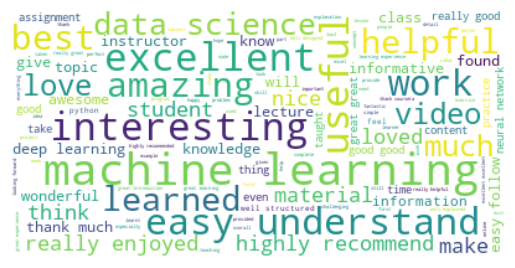

In [102]:
text = " ".join(review for review in mask_rating5.reviews_stem)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", repeat=False, max_words = 200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

OBSERVACIONES:
-Dentro de las palabras que se destacan, se encuentran: 
* Es útil, interesante, fácil de entender, altamente recomendado, maravilloso, el mejor, excelente, lo aman
-Y un detalle curioso, es que nuevamente aparecen cómo palabras fuertes, *Machine Learning, data science, deep learning y se alcanza a ver python*, lo que indica que las reseñas fueron para cursos con esos temas y la mayoría de los cursos que se toman en coursera son relacionados a la programación.

### Ahora analizaremos porque un alumno **NO** está contento con el curso, considero el análisis más imprtante a tomar en cuenta, para evitar los mismos errores

In [103]:
mask_rating1 = coursera_reviews[(coursera_reviews.rating == 1)].reset_index(drop=True)
mask_rating1.sample(5)

,reviews,date_reviews,rating,course_id,year_reviews
3842,VERY POORLY STRUCTURED.ASSIGNMENTS ARE LENGTHY...,2020-09-06,1,java-programming,2020
5969,The course slides are good. But the subject pr...,2019-05-27,1,neuroscience-neuroimaging,2019
1469,Would give this class a half star if I could. ...,2018-02-25,1,python-data-analysis,2018
1640,My project is stuck because of silly code vali...,2020-04-16,1,python-data-analysis,2020
1698,"Other than Mr. Raghu, this course is trash",2018-09-08,1,wharton-customer-analytics,2018


- Pero antes, modificar la normalización, ya que, en este caso nos servirán las palabras en negativo de 2 letras.

In [104]:
#Todo este código permitirá limpiar las reseñas y evitar palabras repetitivas cómo curso
titular_list_1=[]
for titular in mask_rating1.reviews:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Eliminamos las palabras que no queremos estén presentes en la nube de palabras
    titular = [palabra for palabra in titular if len(palabra)>3]
    titular = [palabra for palabra in titular if palabra != 'course']
    titular = [palabra for palabra in titular if palabra != 'curso']
    titular = [palabra for palabra in titular if palabra != 'courses']
    titular = [palabra for palabra in titular if palabra != 'good']
    titular = [palabra for palabra in titular if palabra != 'one']
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    titular_list_1.append(titular)

- Agregamos al dataset para ver las diferencias

In [105]:
#Observen el cambio
mask_rating1["reviews_stem"] = titular_list_1
mask_rating1.sample(5)

,reviews,date_reviews,rating,course_id,year_reviews,reviews_stem
5536,TOO DIFFICULT,2016-10-23,1,neuroeconomics,2016,difficult
162,Nothing help me,2018-05-29,1,python,2018,nothing help
6080,"quizzes are inconsistent with the videos, and ...",2020-01-24,1,accounting-analytics,2020,quizzes inconsistent with videos when took qui...
1243,"The IBM cloud ""service"" leaves much to be desi...",2018-10-30,1,python-for-applied-data-science-ai,2018,cloud service leaves much desired multiple tim...
1508,1. Very difficult to follow and I had to redo ...,2017-08-09,1,python-data-analysis,2017,very difficult follow redo this multiple times...


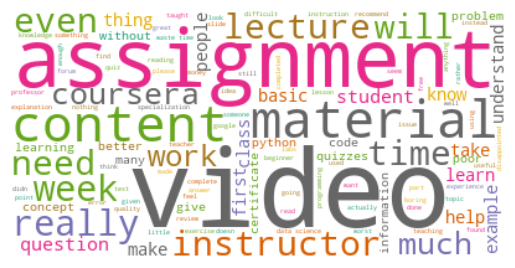

In [106]:
text = " ".join(review for review in mask_rating1.reviews_stem)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

OBSERVACIONES:
-Dentro de las palabras que se destacan, se encuentran: 
* Contenido, tiempo, video, material, tareas, instructor
-En menos frecuencia pero presente: 
* El certificado, concepto, básico, malo
-Leyendo los comentarios se puede observar que lo que más los lleva a dar una mala calificación es una mala calidad del video, contenido básico, tareas repetitivas, que el instructor no sea claro
-------------------------------------------------------------------------------------------------

* Guardando los archivos limpios en formato CSV

In [107]:
#Preparando los datos para csv
coursera_reviews.to_csv('emp_coursera_reviews.csv', index=False, encoding='utf-8')

### VISUALIZAMOS EL DATASET DE CURSOS EN EDX

In [3]:
edx_cursos.sample(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
67,Marketing Digital: Content & Community Manager,Aprende a crear estrategias de marketing de co...,"112,623",Self-paced on your time,Universidad Galileo,Jojo Giuffra-Miguel Morales-Rocael Hernández,Introductory,Communication,Español,Español,3–4 hours per week,5 Weeks,FREE-Add a Verified Certificate for $49 USD,En este curso tendrás acceso a tutoriales y pl...,NaN,https://www.edx.org/course/marketing-digital-c...
289,Italian Language and Culture: Intermediate (20...,Improve your Italian language skills and expan...,"35,058",Self-paced on your time,Wellesley College,Daniela Bartalesi-Graf,Intermediate,Language,Italiano,Italiano,3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $49 USD,Benvenuti e Benvenute! (Welcome!)In this langu...,Benvenute e Benvenuti!With Italian Language an...,https://www.edx.org/course/italian-language-an...
830,Financing Innovative Ventures,Demystify key financial concepts for creating ...,NaN,Self-paced on your time,"The University of Maryland, College Park-Unive...",Michael Pratt,Introductory,Business & Management,English,English,2–3 hours per week,4 Weeks,FREE-Add a Verified Certificate for $149 USD,This course will demystify key financial conce...,Module 1: The Early Stage Investment Landscape...,https://www.edx.org/course/financing-innovativ...


- Revisión de valores nulos

<Axes: >

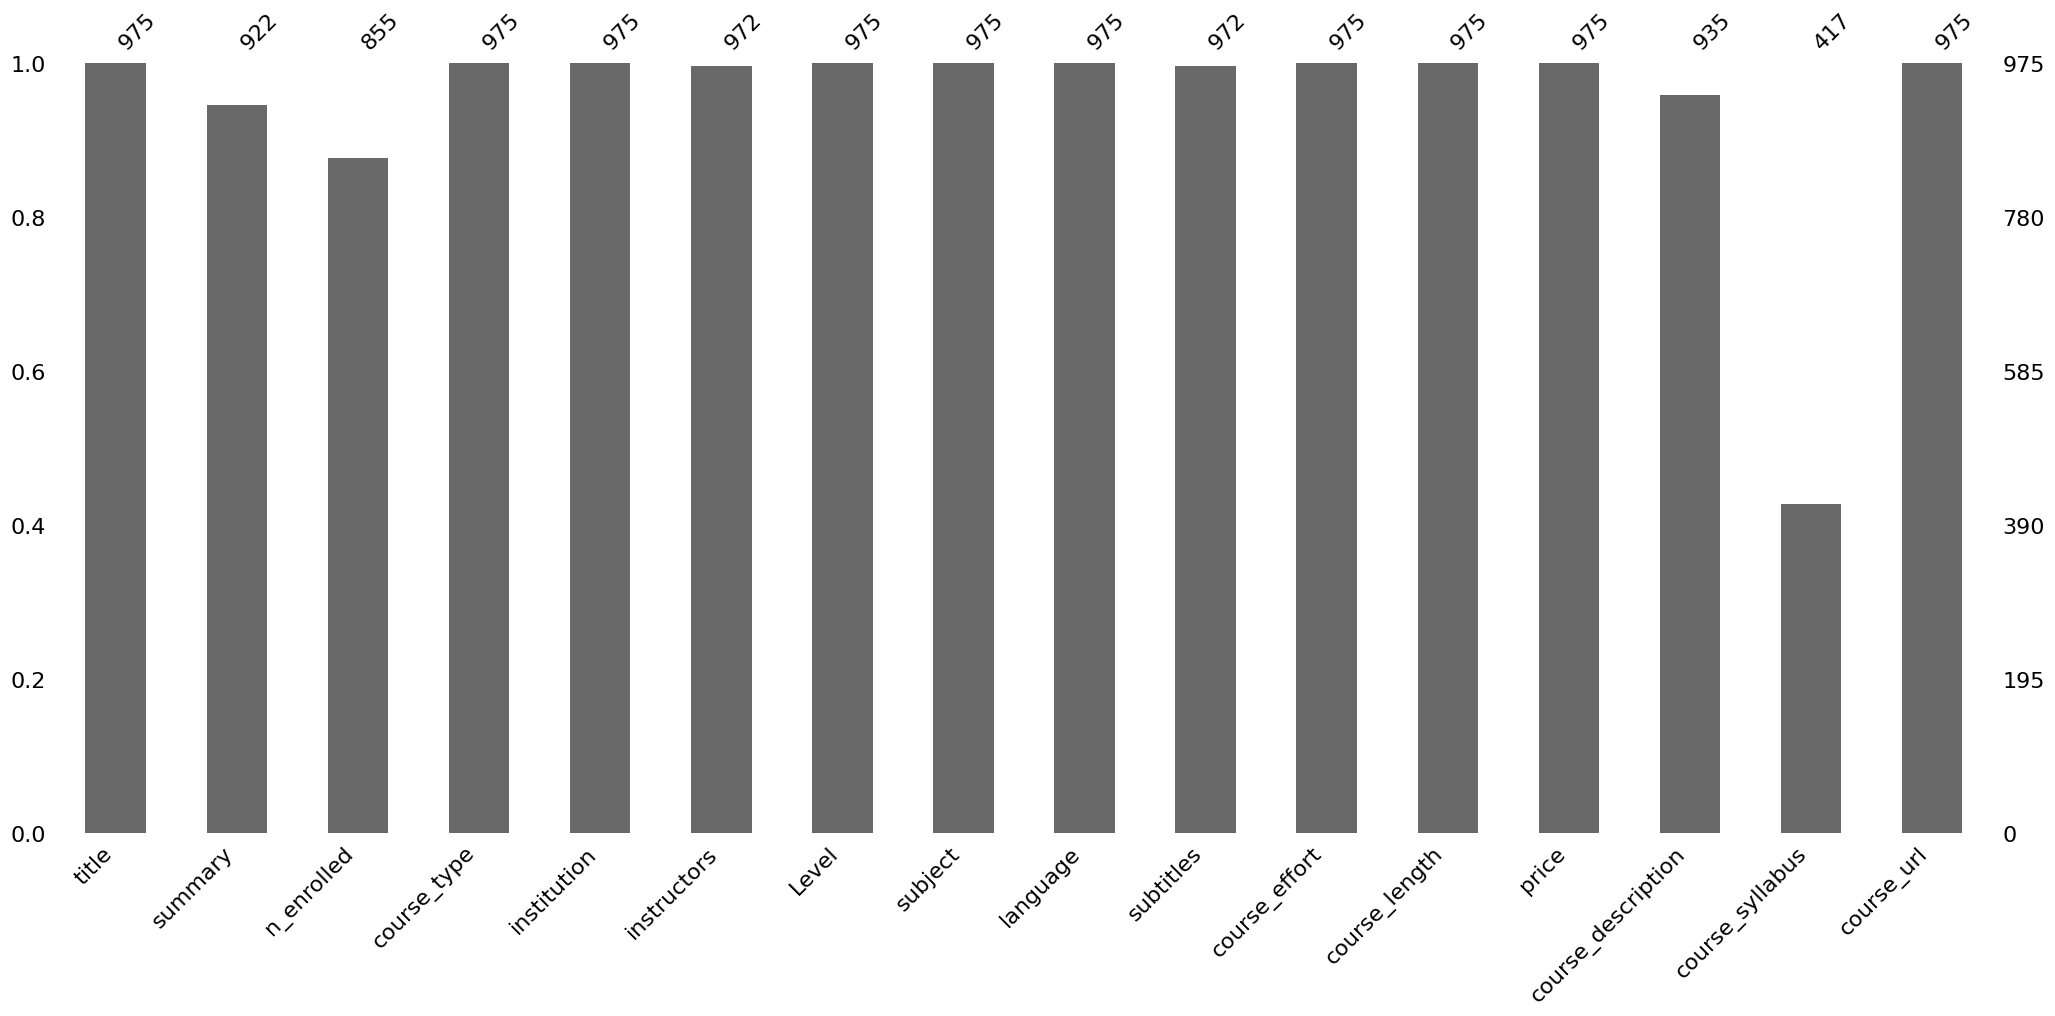

In [4]:
msno.bar(edx_cursos)

- Normalizar las columnas numéricas: 'n_enrolled', 'course_length' y 'price'

In [5]:
edx_cursos['n_enrolled'] = edx_cursos.n_enrolled.str.replace('[^\d-]', '', regex=True)
edx_cursos['course_length'] = edx_cursos.course_length.str.replace('[^\d-]', '', regex=True)
edx_cursos['price'] = edx_cursos.price.str.replace('[^\d-]', '', regex=True)
edx_cursos['price'] = edx_cursos.price.str.replace('-', '', regex=True) #Elimina un '-' que aparecía después de eliminar caractéres que no son dígitos
edx_cursos.sample(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
55,Italian Language and Culture: Beginner (2019-2...,Learn the basics of the Italian language and c...,182462,Self-paced on your time,Wellesley College,Daniela Bartalesi-Graf,Introductory,Language,Italiano,Italiano,2–5 hours per week,12,49,Benvenuti e Benvenute! (Welcome!)In this langu...,Benvenute e Benvenuti!Italian Language and Cul...,https://www.edx.org/course/italian-language-an...
265,"LaTeX for Students, Engineers, and Scientists",Explore a new way of writing and typesetting a...,11823,Self-paced on your time,IITBombay,Deepak B. Phatak-Firuza Karmali (Aibara)-Nages...,Introductory,Engineering,English,English,3–4 hours per week,7,139,"LaTeX, a document preparation system, is widel...",Topic 1: Introduction\nThis topic introduces t...,https://www.edx.org/course/latex-for-students-...
600,Introducción a la Inteligencia Artificial,¿Es posible construir una máquina o robot inte...,11184,Self-paced on your time,Universidades Anáhuac,Román Alberto Zamarripa Franco,Introductory,Computer Science,Español,Español,4–5 hours per week,4,49,La Inteligencia Artificial (IA) está tomando m...,Módulo 1.Comprenderás los conceptos de Intelig...,https://www.edx.org/course/introduccion-a-la-i...


In [6]:
#SE REEMPLAZA LOS VALORES NULOS POR CERO, PARA PODER HACER LA CONVERSIÓN PERO, ES UN VALOR FALTANTE
edx_cursos['n_enrolled']= edx_cursos['n_enrolled'].replace([np.nan],['0'])
edx_cursos.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


In [7]:
#Convertir a variable numérica las columnas 'n_enrolled','course_length','price'
edx_cursos =edx_cursos.astype({'n_enrolled': int, 'course_length': int,'price':int  })
edx_cursos[['n_enrolled', 'course_length', 'price']].dtypes

n_enrolled       int32
course_length    int32
price            int32
dtype: object

- Eliminar columnas que no son necesarias para el análisis posterior

In [12]:
edx_cursos.drop(['instructors', 'course_syllabus', 'course_url'], axis=1, inplace=True)
edx_cursos.shape

(975, 13)

- Renombrando las columnas 'course_length' y 'price'

In [14]:
edx_cursos = edx_cursos.rename(columns={'course_length':'course_length_week',
                                   'price':'price_usd'})
edx_cursos.sample()


,title,summary,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length_week,price_usd,course_description
700,"Proteins: Alignment, Analysis and Structure",Learn about proteins and the important role st...,23560,Instructor-led on a course schedule,University System of Maryland-University of Ma...,Advanced,Biology & Life Sciences,English,English,8–10 hours per week,8,249,Proteins play a very important role in all org...


Tenemos:
- 8 Variables Categóricas
- 3 Numéricas
- 2 Texto

#### ANÁLISIS VARIADO Y MULTIVARIADO

*** **VARIABLES CATEGÓRICAS**

In [16]:
institution_top = edx_cursos.institution.value_counts().head(20)

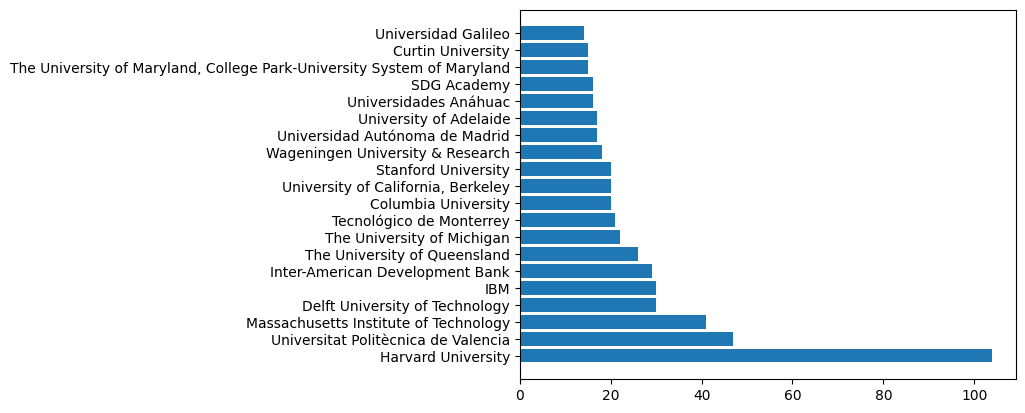

In [17]:
plt.barh(institution_top.index, institution_top)
plt.show()

OBSERVACIONES: 
-Las universidades más famosas son las que están aprovechando este tipo de educación

* Análisis de las columnas 'course_type', 'Level' y 'language'

C:\Users\nanci\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
C:\Users\nanci\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
C:\Users\nanci\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  func(*args, **kwargs)
C:\Users\nanci\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
C:\Users\nanci\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  func(*args, **kwargs)
C:\Users\n

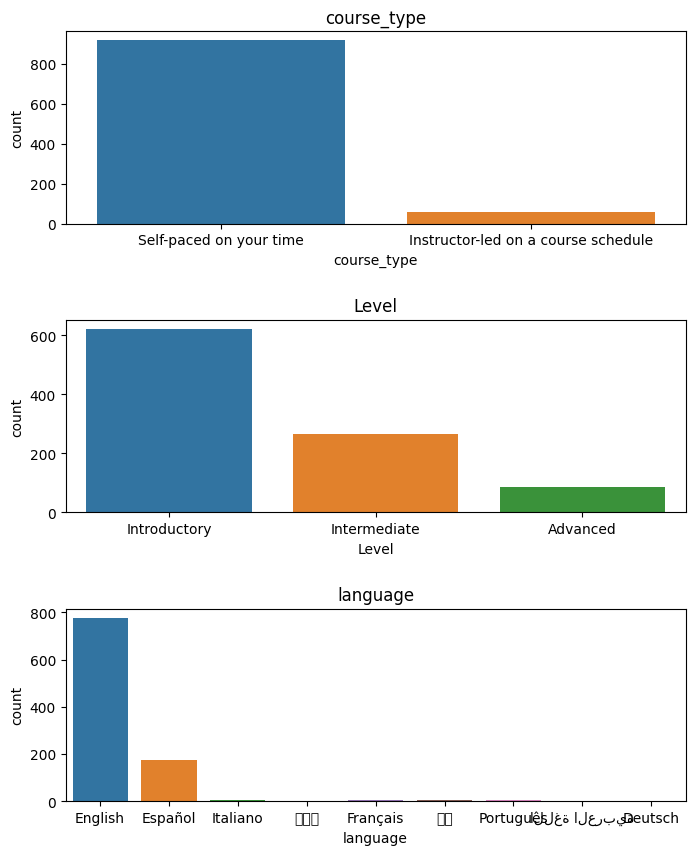

In [18]:
col_cat = ['course_type', 'Level', 'language']

#Gráficos de barras conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=edx_cursos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels())

OBSERVACIONES: 
- En EDX, hay más cursos on demand
- Más de la mitad de los cursos son a nivel Introductorio
- El lenguaje por excelencia para los cursos son en Inglés, seguramente por ser el idioma universal
- **Por lo mismo, no tiene caso mantener idiomas que están muy por debajo del 1%, pero no los elimnaré, procedo a agrupar esos idiomas en una categoría llamada: 'otro'*
-------------------------------------------------------------------------------------------------

- Agregando categoría 'otro' en lenguajes para idiomas distintos a Inglés, Español

In [23]:
mask_idioma = edx_cursos[(edx_cursos['language'] != 'English')&(edx_cursos['language'] != 'Español')]
mask_idioma.language.value_counts()

Français         7
Italiano         4
中文               4
Português        4
日本語              1
اللغة العربية    1
Deutsch          1
Name: language, dtype: int64

In [24]:

edx_cursos['language']= edx_cursos['language'].replace(['Français', 'Italiano', '中文', 'Português', 
                                                        '日本語', 'اللغة العربية', 'Deutsch'],
                                           ['otro', 'otro', 'otro', 'otro', 'otro', 'otro', 'otro'])

In [25]:
edx_cursos['language'].value_counts()

English    777
Español    176
otro        22
Name: language, dtype: int64

- Revición de la variable 'subject'

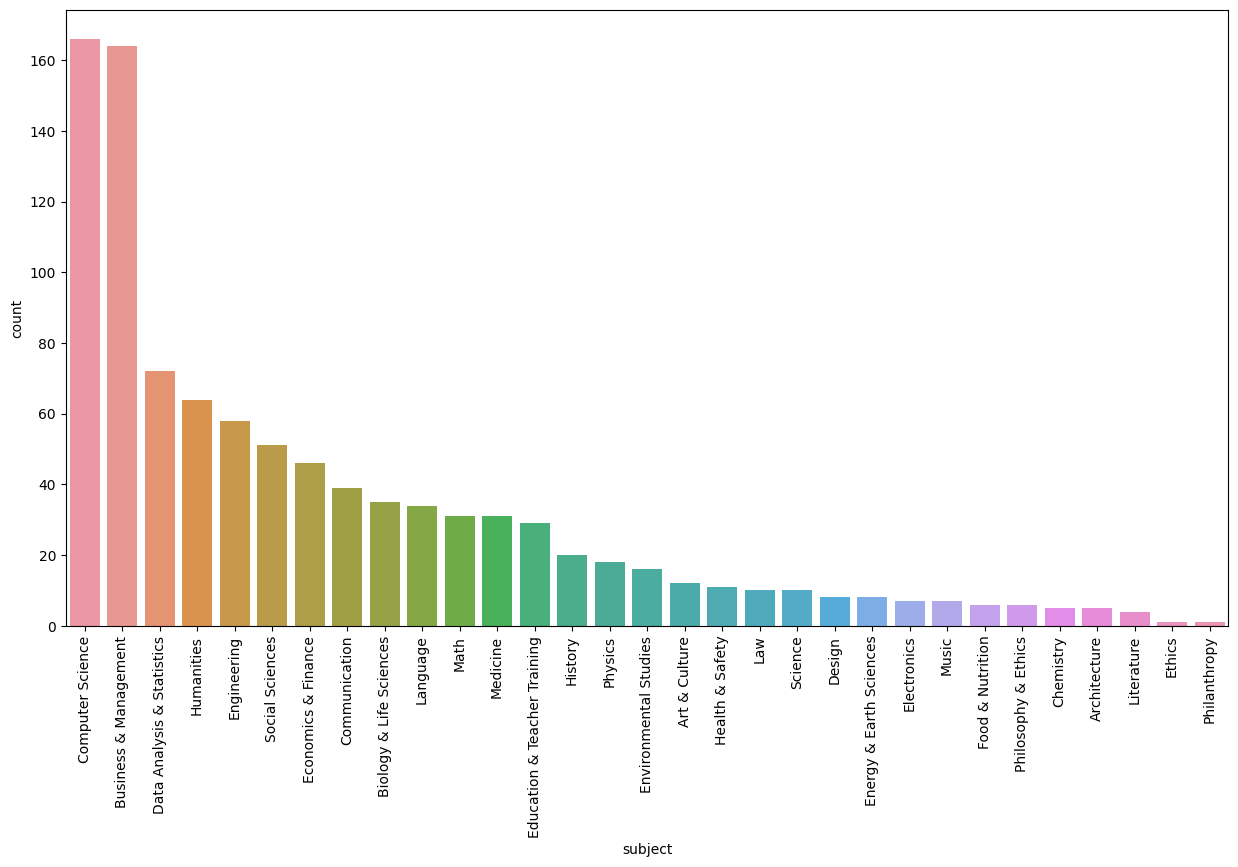

In [13]:
plt.figure(figsize = (15,8))
plot = sns.countplot(x='subject', data=edx_cursos, order=edx_cursos['subject'].value_counts().index)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

OBSERVACIONES:
* Ciencias de la computación y Gestión de negocios son los cursos impartidos con más frecuencia seguido de Análisis de Datos y Estadística
-------------------------------------------------------------------------------------------------

- Revisión de la variable 'course_effort'

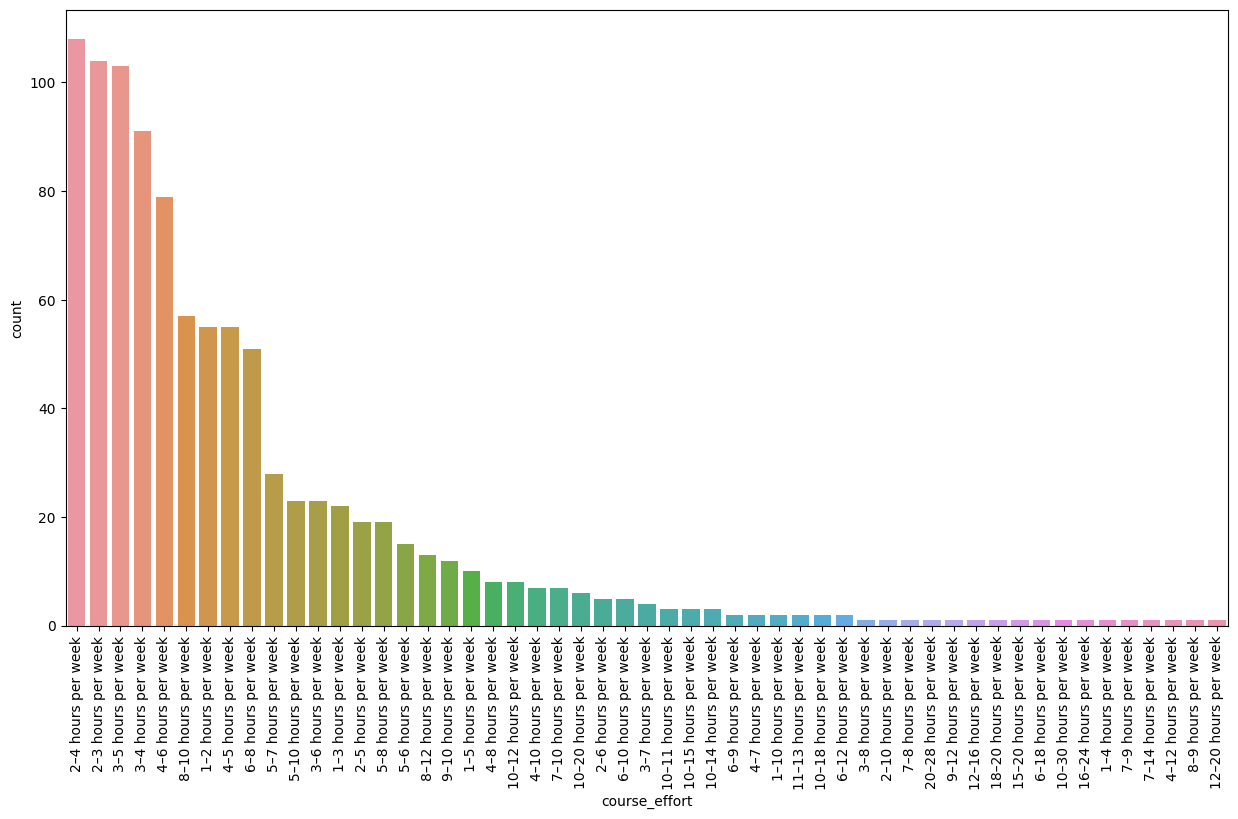

In [14]:
plt.figure(figsize = (15,8))
plot = sns.countplot(x='course_effort', data=edx_cursos, 
                     order=edx_cursos['course_effort'].value_counts().index)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

OBSERVACIONES: 
- Se puede observar que hay más cursos que se requieren entre 2-6 horas a la semana, pero hay tantas categorías que por si sola esta variable no dice nada importante
-------------------------------------------------------------------------------------------------

*** **VARIABLES NUMÉRICAS**

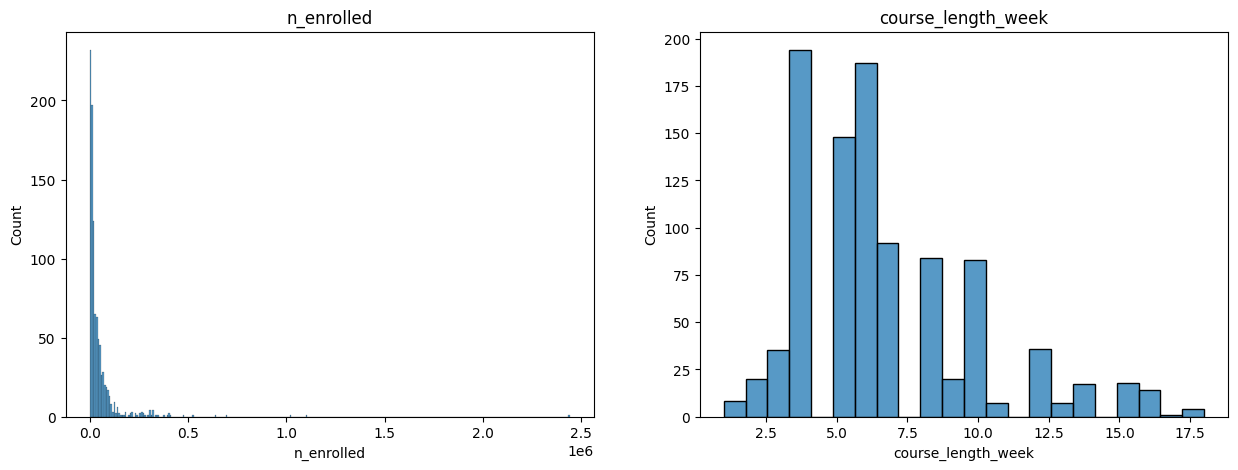

In [26]:
col_num = ['n_enrolled', 'course_length_week']

#Gráficos 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.histplot(x=col, data=edx_cursos, ax=ax[i], bins='auto')
    ax[i].set_title(col)

In [27]:
edx_cursos['course_length_week'].describe()

count    975.000000
mean       6.705641
std        3.150327
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       18.000000
Name: course_length_week, dtype: float64

OBSERVACIONES:

-Para la columna de inscritos, hay un sesgo hacia la izquierda, pero también se detectaron outliers y falta de información

-Para la columna de duración del curso, se observa que la mayoría de los cursos están entre las 3-6 semanas de duración.



* Columna 'price(usd)'

In [28]:
edx_cursos['price_usd'].describe()

count      975.000000
mean       227.272821
std       1890.727810
min          5.000000
25%         49.000000
50%         79.000000
75%        149.000000
max      39960.000000
Name: price_usd, dtype: float64

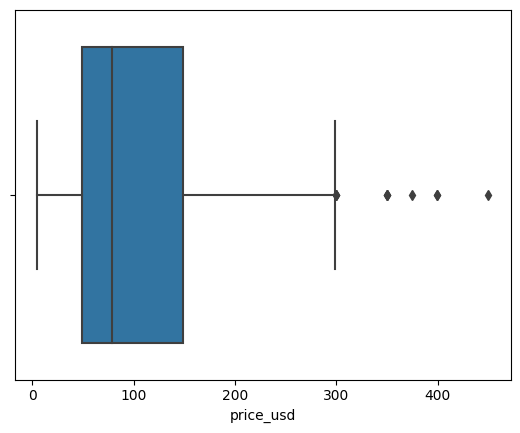

In [29]:
#Detección de outliers
outlier = edx_cursos[edx_cursos['price_usd']<451]
sns.boxplot(x = 'price_usd', data = outlier)
plt.show()

In [30]:
#Estos son los valores outliers, he revisado en la página de los cursos y es un error de tipeo
edx_cursos[edx_cursos['price_usd']>450]

,title,summary,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length_week,price_usd,course_description
433,Información financiera y su análisis,Aplica fundamentos contables y financieros par...,5473,Self-paced on your time,Tecnológico de Monterrey,Advanced,Economics & Finance,Español,Español,5–8 hours per week,4,4999,Muchas empresas desaparecen por mala administr...
514,Network and Security Foundations,This course introduces the components of a com...,7301,Self-paced on your time,Western Governors University,Introductory,Computer Science,English,English,9–10 hours per week,8,29970,"As computer systems become smaller, cheaper, a..."
543,Information Technology Foundations,Information Technology Foundations examines IT...,6388,Self-paced on your time,Western Governors University,Introductory,Computer Science,English,English,9–10 hours per week,6,39960,Information technology (IT) can be viewed as a...
669,Introducción a Matemáticas para Finanzas y Neg...,El objetivo del curso es entender como ciertos...,0,Self-paced on your time,Tecnológico de Monterrey,Advanced,Economics & Finance,Español,Español,5–8 hours per week,5,4999,En la primera parte del curso se analiza el ca...
707,Indian & Tibetan River of Buddhism,Explore an overview of the history and philoso...,6738,Self-paced on your time,Columbia University,Intermediate,Humanities,English,English,2–4 hours per week,12,4999,The course begins with a survey of the origins...
797,Introducción a la factura electrónica,Conoce los beneficios de la facturación electr...,5829,Self-paced on your time,LOGYCA,Intermediate,Economics & Finance,Español,Español,3–4 hours per week,4,4990,"La factura electrónica, es la innovación que h..."
848,Introducción a Ciencias de Datos y Estadística...,En este curso adquirirás los métodos estadísti...,0,Self-paced on your time,Tecnológico de Monterrey,Advanced,Data Analysis & Statistics,Español,Español,5–8 hours per week,4,4999,Este curso te permitirá desarrollar habilidade...
962,Scripting and Programming Foundations,This course is an introduction to programming ...,0,Self-paced on your time,Western Governors University,Introductory,Computer Science,English,English,9–10 hours per week,8,29970,Computer programs are abundant in many people'...


In [31]:
#Se procede a reemplazar los datos, dejando las cifras a 3 dígitos
edx_cursos['price_usd']= edx_cursos['price_usd'].replace([4999, 29970, 39960, 4990],
                                           [499, 299, 399, 499])

<Axes: xlabel='price_usd', ylabel='Count'>

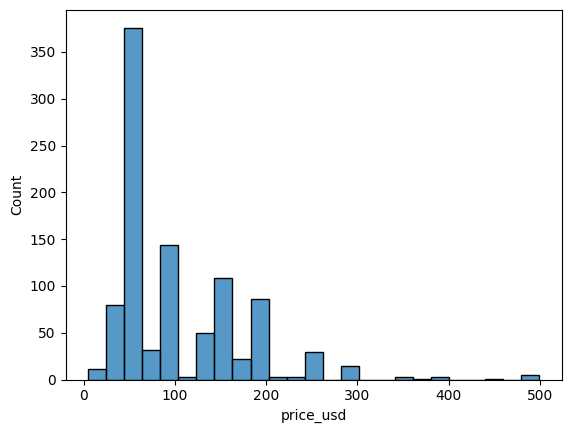

In [32]:
sns.histplot(x='price_usd', data=edx_cursos, bins='auto')

In [33]:
edx_cursos['price_usd'].describe()

count    975.000000
mean     102.766154
std       75.075354
min        5.000000
25%       49.000000
50%       79.000000
75%      149.000000
max      499.000000
Name: price_usd, dtype: float64

OBSERVACIONES:

- La mayoría de los precios ronda los 49usd

#### Análisis de correlación entre variables

- Variables numéricas

In [35]:
#Se procede a eliminar estos datos desconocidos, para evitar confusiones en el gráfico
df_enrolled = edx_cursos.drop(edx_cursos[edx_cursos['n_enrolled']==0].index)
df_enrolled.shape

(855, 13)

<Axes: xlabel='price_usd', ylabel='n_enrolled'>

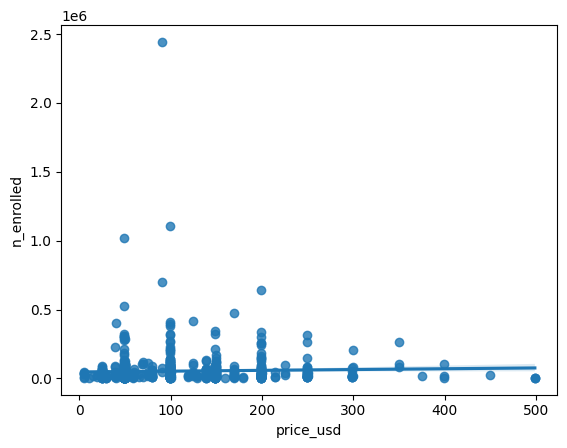

In [36]:
sns.regplot(x='price_usd', y='n_enrolled', data=df_enrolled)

OBSERVACIONES:
Hay una mayor inscripción a los cursos con precio menor a los 200usd, el problema con estos datos, es que no podemos saber quienes pagaron y quienes no, porque todos estos son gratuitos y si quieres certificado, debes de hacer el pago.Es por eso que la correlación es básicamnte 0.

-------------------------------------------------------------------------------------------------

* Análisis bivariado entre la cantidad de inscritos y el nivel, idioma y materia

<Axes: xlabel='Level', ylabel='n_enrolled'>

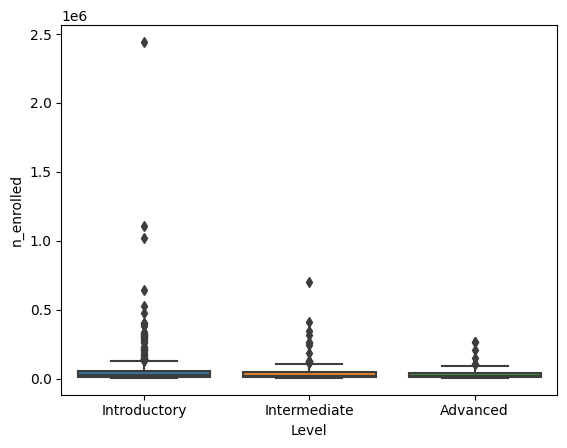

In [47]:
sns.boxplot(x='Level', y='n_enrolled', data=df_enrolled)

<Axes: xlabel='language', ylabel='n_enrolled'>

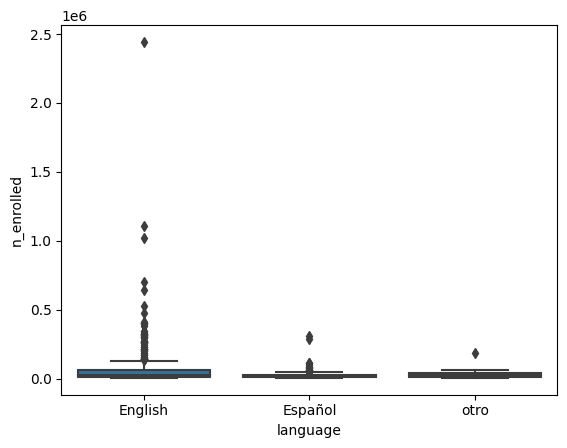

In [37]:
sns.boxplot(x='language', y='n_enrolled', data=df_enrolled)

- A continuación se grafica la relación entre la materia y el número de inscritos a los cursos, primero con outliers y después con un acercamiento para observar mejor que ocurre

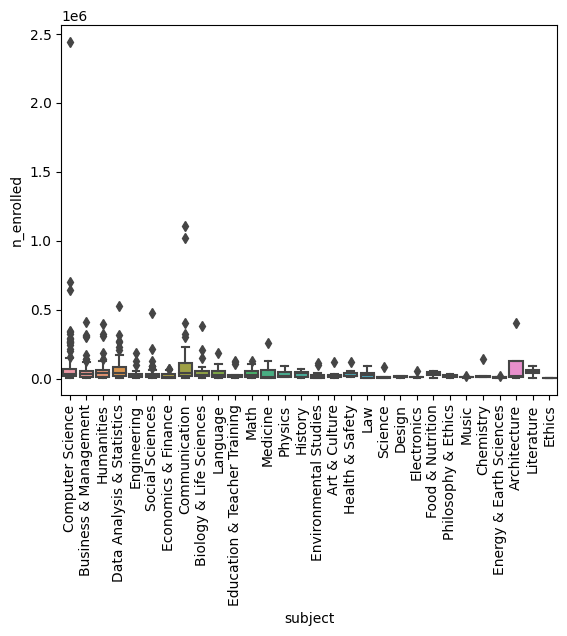

In [61]:
plot = sns.boxplot(x='subject', y='n_enrolled', data=df_enrolled,
                   order=df_enrolled['subject'].value_counts().index)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

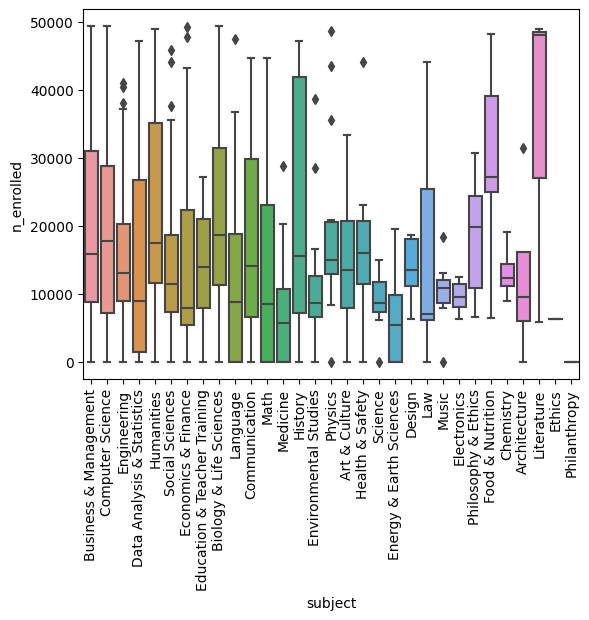

In [62]:
outlier = edx_cursos[edx_cursos['n_enrolled']<50000]
plot = sns.boxplot(x='subject', y='n_enrolled', data=outlier,
                   order=outlier['subject'].value_counts().index)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

OBSERVACIONES: 
- Se confirma que los alumnos prefieren tomar cursos en un MOOC a nivel introductorio, no avanzado ni intermedio. Así cómo inscribirse a cursos que esten en idioma inglés.
- Para la variable 'subject', prefieren estudiar las ciencias de la comunicación, pero por lo que se observa en el gráfico y la gran cantidad de outliers, tienen preferencia por ciertos temas, habrá que tomarlo en cuenta, ya que al hacer el acercamiento, parece ser que Business & Managment tiene un poco más de inscritos que ciencias de la computación
-------------------------------------------------------------------------------------------------

- Correlación de variables categóricas

C:\Users\nanci\AppData\Local\Temp\ipykernel_120\2371142553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_enrolled.corr())


<Axes: >

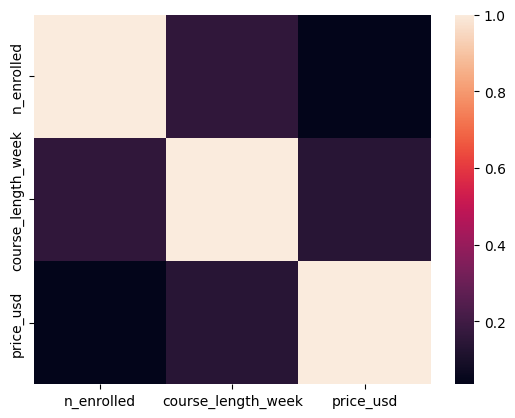

In [38]:
sns.heatmap(df_enrolled.corr())

OBSERVACIONES: 

- No hay relación ente la variable precio y el número de inscritos, cómo se mencionó anteriormente, no se sabe cuántos de esos inscritos pagaron para obtener su certificado.

**Nube de palabras para la variable texto**

In [67]:
# Importamos esta libreria que nos permite reemplazar caracteres
from nltk.corpus import wordnet
import nltk
import re

#Todo este código permitirá limpiar las reseñas y evitar palabras repetitivas cómo curso
titular_list_2=[]
for titular in df_enrolled.title:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Eliminamos las palabras que no queremos estén presentes en la nube de palabras
    titular = [palabra for palabra in titular if len(palabra)>3]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    titular_list_2.append(titular)

In [69]:
#Observen el cambio
df_enrolled["title_stem"] = titular_list_2
df_enrolled.sample(5)

,title,summary,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length(week),price(usd),course_description,title_stem
399,"Marketing Analytics: Products, Distribution an...",This course is part of a MicroMasters® Program,50588,Self-paced on your time,"University of California, Berkeley",Intermediate,Computer Science,English,English,5–7 hours per week,4,249,"In this marketing course, you will learn how t...",marketing analytics products distribution sales
341,Creative Coding,Learn object-oriented programming for graphic ...,18660,Instructor-led on a course schedule,New York University,Introductory,Design,English,English,8–10 hours per week,14,249,"In Creative Coding, students learn to design a...",creative coding
287,Fundamentos de anatomía y técnica quirúrgica b...,Aprende de una manera creativa y divertida cóm...,12133,Instructor-led on a course schedule,Universidad del Rosario,Introductory,Medicine,Español,Español,4–6 hours per week,4,49,La anatomía es la ciencia que estudia la forma...,fundamentos anatom cnica quir rgica sica
321,Embedded Systems - Shape The World: Microcontr...,NaN,69182,Self-paced on your time,The University of Texas at Austin,Intermediate,Computer Science,English,English,8–10 hours per week,8,49,"Learn how electronic gadgets are designed, dev...",embedded systems shape world microcontroller i...
365,Work and Employment for a Sustainable Future,We are living in a financially fragile world. ...,6528,Self-paced on your time,SDG Academy,Intermediate,Economics & Finance,English,English,2–4 hours per week,6,49,National economies have grown substantially si...,work employment sustainable future


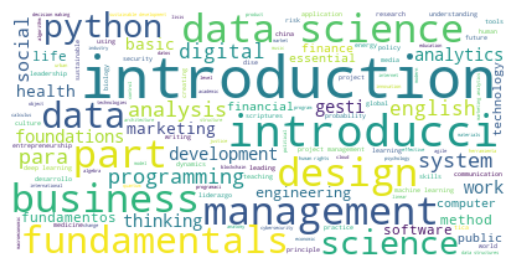

In [70]:
text = " ".join(review for review in df_enrolled.title_stem)
stopwords = set(STOPWORDS)

# Genera la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Se genera la imagen que la va a contener:
# se usa matplotlib:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

OBSERVACIONES: 
- Mismo caso que para Coursera, los cursos introductorios o con fundamentos de alguna materia son los más buscados. 
- Del mismo modo, aparece muy fuerte el tema de python y análisis de datos para el área de programación, así cómo Gestión de Negocios 
-------------------------------------------------------------------------------------------------

- Después del análisis, no se consideró relevante revisar las columnas de 'summary' ni 'course_description', además que tienen varios datos nulos o en otro idioma, se procede a eliminarlos, así cómo, las columnas: 'subtitles' y 'course_effort' que no se utilizarán para el análisis.

In [59]:
edx_clean = df_enrolled.drop(['summary', 'course_description', 'subtitles', 'course_effort'], axis=1)
edx_clean.shape

(855, 9)

- Checando duplicados y proceder a eliminar si los hay

In [60]:
edx_clean.duplicated().sum()

1

In [61]:
edx_clean.drop_duplicates(inplace=True)

In [62]:
edx_clean.shape

(854, 9)

In [63]:
#Se ubica 2 títulos repetidos pero con diferentes características, se renombra uno
edx_clean[(edx_clean['title']=='Marketing Management')& (edx_clean['Level']=='Advanced')].replace
edx_clean.loc[(edx_clean['title']=='Marketing Management')& (edx_clean['Level']=='Advanced'), 
              "title"] = 'Marketing Mangement Advanced'

In [64]:
edx_clean.title.duplicated().sum()

0

In [65]:
edx_clean.sample()

,title,n_enrolled,course_type,institution,Level,subject,language,course_length_week,price_usd
879,Diseño y Desarrollo de Recursos Multimedia par...,14266,Self-paced on your time,Universidad Galileo,Intermediate,Humanities,Español,4,49


* Guardando los archivos limpios en formato CSV

In [47]:
#Preparando los datos para csv
edx_clean.to_csv('emp_edx.csv', index=False, encoding='utf-8')

## VISUALIZAMOS EL DATASET DE CURSOS EN UDEMY

In [48]:
udemy_cursos.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


- Revisión valores nulos

<Axes: >

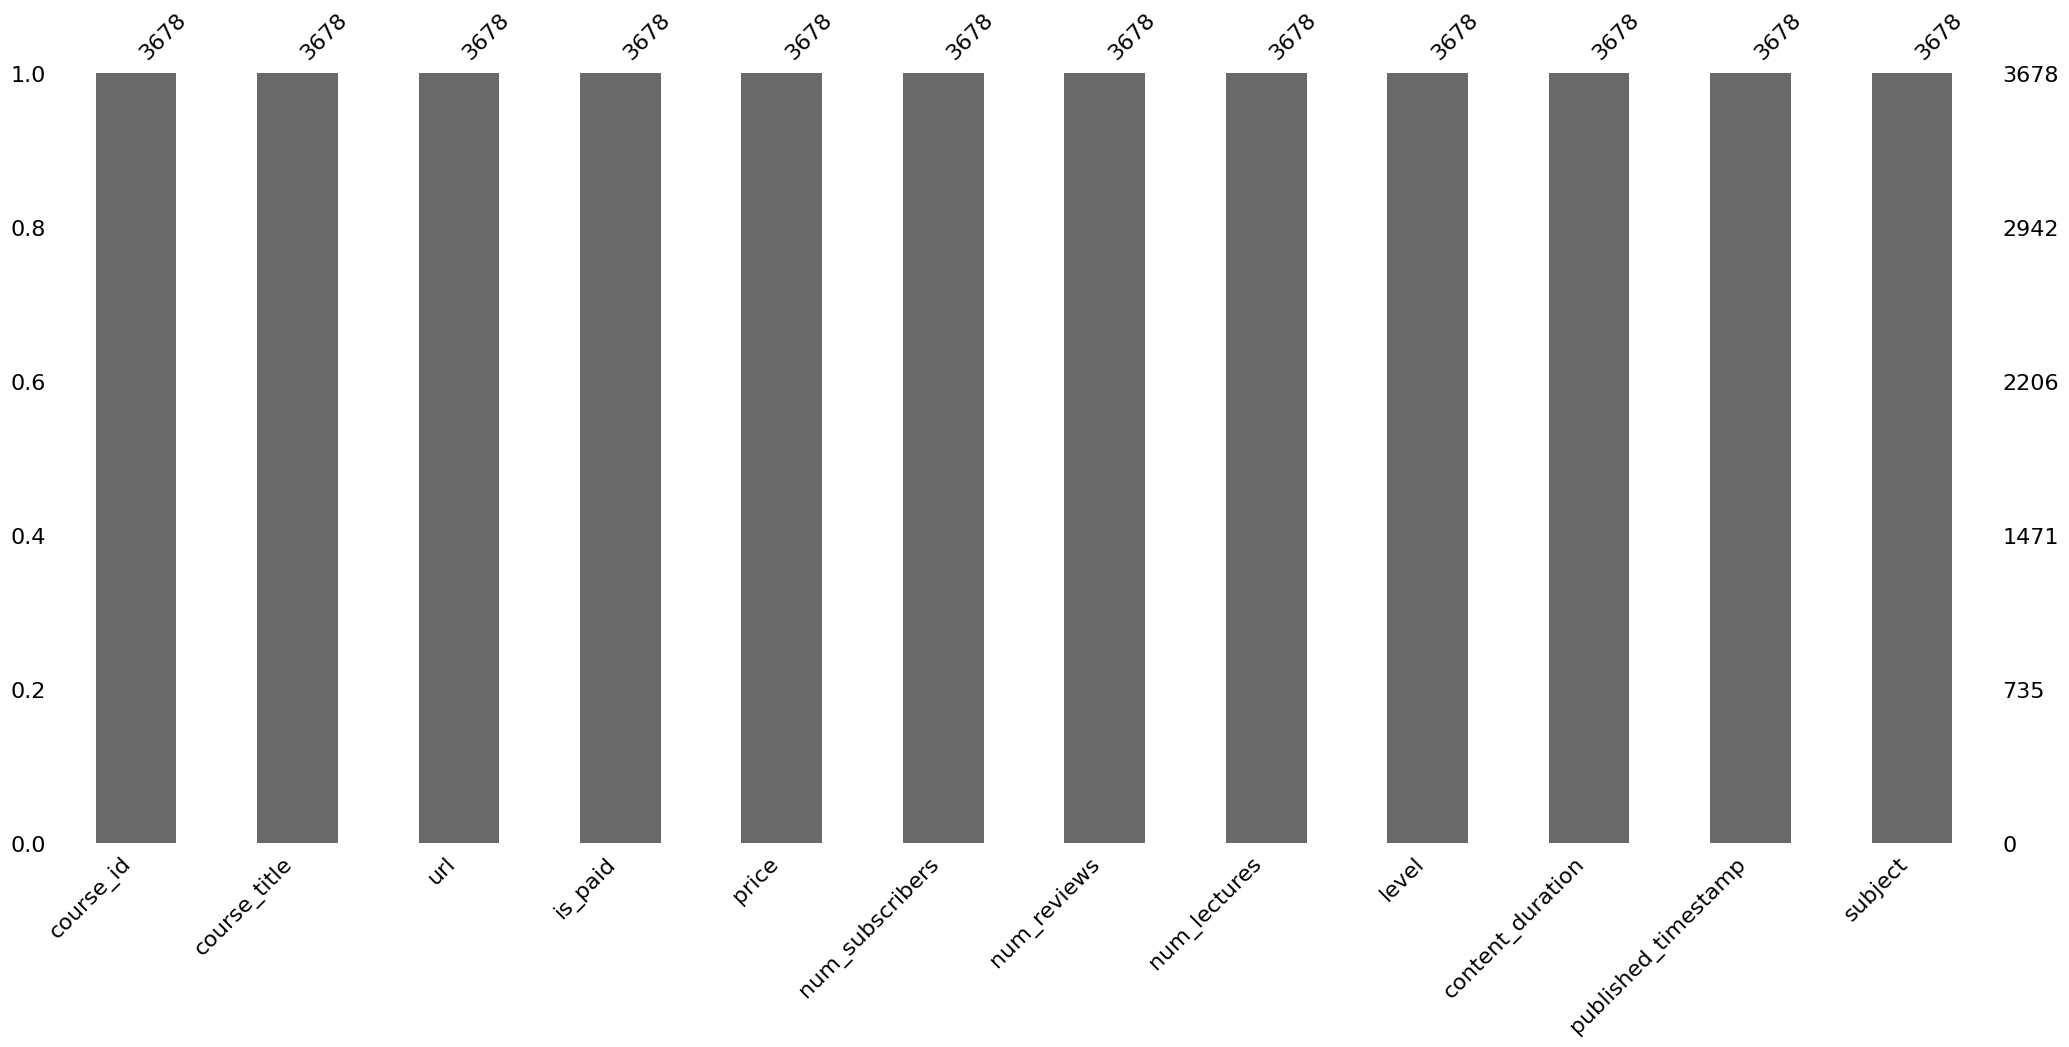

In [49]:
msno.bar(udemy_cursos)

#Aparentemente no hay datos nulos

- Tipo de datos

In [7]:
udemy_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


* Cambiar tipo de dato de la columna 'published_timestamp'

In [50]:
udemy_cursos['published_timestamp'] = pd.to_datetime(udemy_cursos['published_timestamp'], errors='coerce')

In [51]:
udemy_cursos['published_time'] = [d.date() for d in udemy_cursos['published_timestamp']]

In [52]:
#El periodo de los datos de este dataset, es algo antiguo, del 2011-2017
udemy_cursos['published_time'] = pd.to_datetime(udemy_cursos['published_time'], errors='coerce')
udemy_cursos.published_time.describe()

C:\Users\nanci\AppData\Local\Temp\ipykernel_980\3806855833.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  udemy_cursos.published_time.describe()


count                    3678
unique                   1210
top       2017-05-01 00:00:00
freq                       21
first     2011-07-09 00:00:00
last      2017-07-06 00:00:00
Name: published_time, dtype: object

- Eliminar columnas que no son necesarias para el análisis posterior

In [53]:
udemy_cursos.drop(['url', 'published_timestamp'], axis=1, inplace=True)
udemy_cursos.sample()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_time
1160,54677,Revealed: Profitable Principles of Successful ...,True,25,1046,5,26,All Levels,3.0,Business Finance,2013-05-19


* Eliminamos duplicados del dataset

In [54]:
udemy_cursos.drop_duplicates(inplace=True)
udemy_cursos.shape

(3672, 11)

In [55]:
#SE AGREGA COLUMNA YEAR_PUBLISHED
udemy_cursos['year_published'] = udemy_cursos['published_time'].dt.year

Este dataset cuenta con:
* 3 variables categóricas
* 6 variables numéricas
* 1 Texto

#### ANÁLISIS VARIADO Y MULTIVARIADO


*** **VARIABLES CATEGÓRICAS**

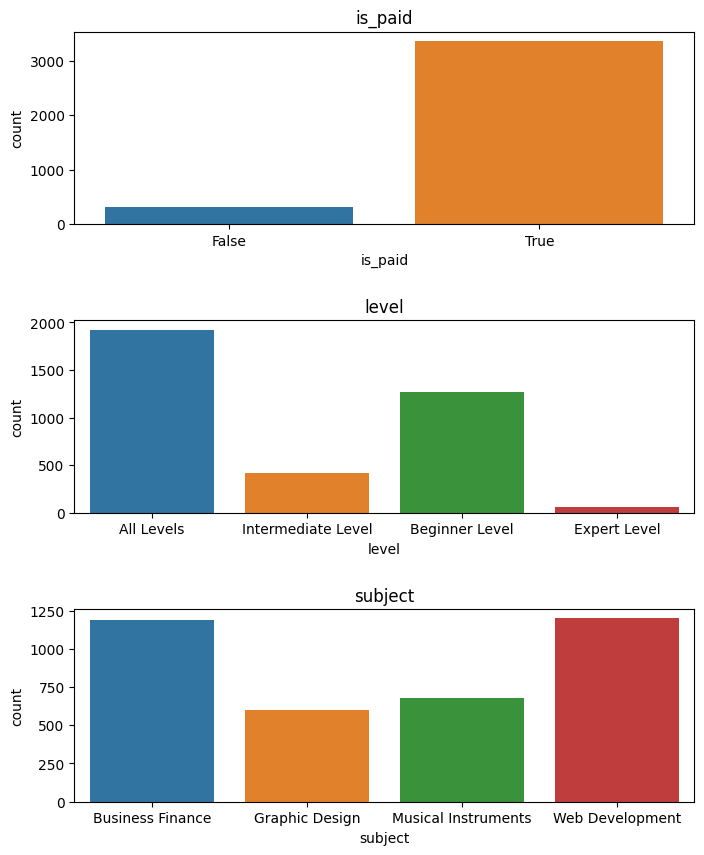

In [28]:
col_cat = ['is_paid', 'level', 'subject']

#Gráficos de barras conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=udemy_cursos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels())

OBSERVACIONES: 
- La variable que nos confirma si el consumidor pagó o no, es la que nos servirá más adelante para nuestro KPI de tasa de conversión. Se observa que hay una diferencia grande entre los que pagan y los que no, cabe mencionar que a diferencia de otros MOOCS, Udemy tiene cursos impartidos por creadores de contenido y sus certificados, no tienen valor oficial, veremos que más nos vamo encontrando.
- Para la columna 'level', el término "All levels" es muy ambiguo, pero se traduciría cómo fundamentos o una mezcla entre begginers y intermedies, que puede aprender un 'nivel experto' entre principiantes. Aún así, es la tercera plataforma en la que hay una gran cantidad de cursos para principiantes?.
- Para la columna 'Subject' cómo en las otras plataformas se observa una preferencia por los cursos 'Web Development' y 'Gestión de Negocios', sin embargo, la plataforma tiene 8 categorías, se desconoce si son nuevas o sólo no se quisieron tomar en cuenta, las cuales son: Negocios, Diseño, Música, Desarrollo Web y las nuevas: Marketing, Informática y Software, Desarrollo Personal y Fotografía


*** **VARIABLES NUMÉRICAS**

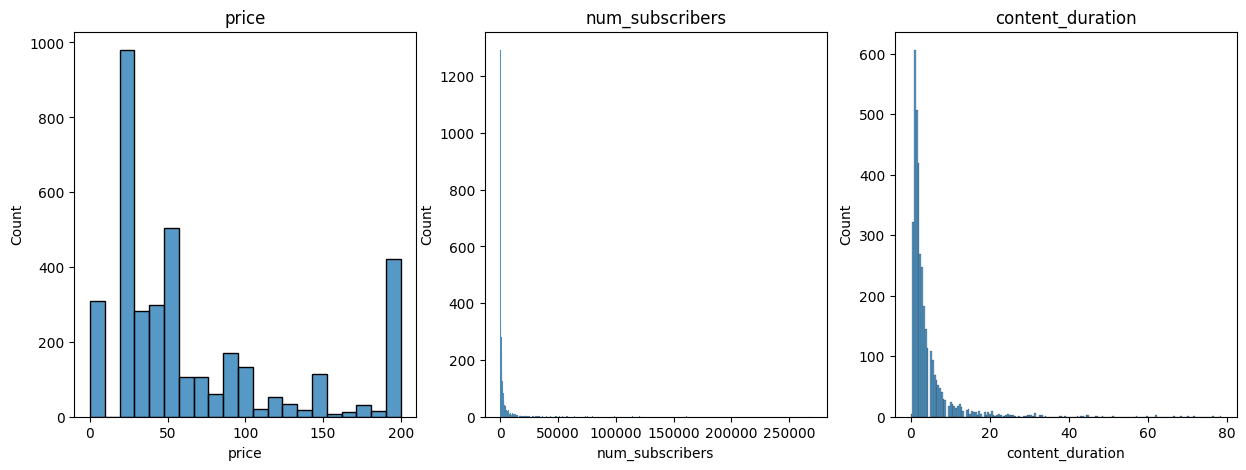

In [29]:
col_num = ['price', 'num_subscribers', 'content_duration']

#Gráficos 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.histplot(x=col, data=udemy_cursos, ax=ax[i], bins='auto')
    ax[i].set_title(col)

In [30]:
udemy_cursos[['price', 'num_subscribers', 'content_duration']].describe()

,price,num_subscribers,content_duration
count,3672.000000,3672.000000,3672.000000
mean,66.102941,3190.586874,4.097603
std,61.035920,9488.105448,6.057830
min,0.000000,0.000000,0.000000
25%,20.000000,111.750000,1.000000
50%,45.000000,912.000000,2.000000
75%,95.000000,2548.750000,4.500000
max,200.000000,268923.000000,78.500000


OBSERVACIONES:
- Hay presencia de outliers en las variables 'num_subscribers', 'content_duration'
- Para la variable precio no hay una tendencia clara, se inclina más por cursos a bajo coste por menos de 30usd, pero también hay una importante cantidad de cursos con un precio de 200usd que algunos alumnos están dispuestos a pagar
- Los subscriptores a los cursos tienen un promedio de 3191
- Con un promedio de duración de 4 horas, pero claramente se nota, que hay más cursos con duración menor a 3 horas 

-------------------------------------------------------------------------------------------------

#### * **Análisis bivariado**

<Axes: xlabel='level', ylabel='price'>

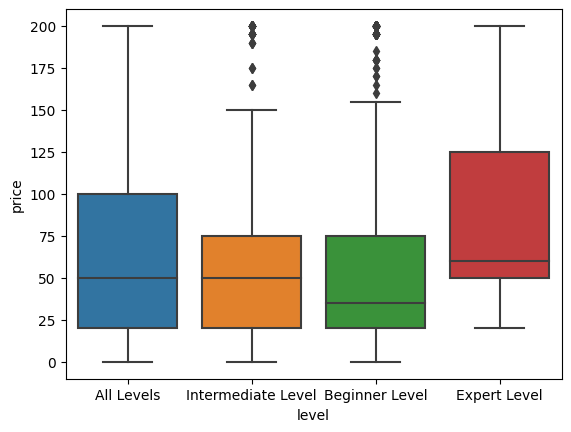

In [31]:
sns.boxplot(x='level', y='price', data=udemy_cursos)

- Aprovecharé el análisis bivariado para comparalo con la tasa de conversión, para encontrar información importante para determinar que factores son los que influyen en dicha métrica

In [32]:
#Tasa de conversión: Del total de alumnos, cuántos pagaron el curso
#Convertir la variable a predecir a binaria:

diccionario = {True:1, False:0}
binario = udemy_cursos['is_paid'].map(diccionario)
udemy_cursos['y_bin'] = binario

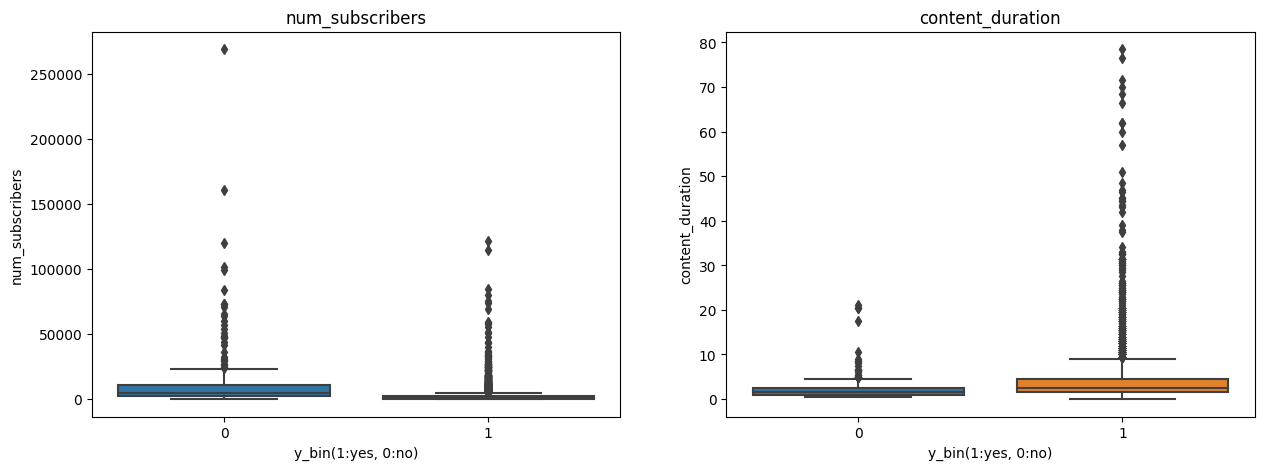

In [33]:
#Analizar entre las variables numéricas y la variable a predecir
col_num = ['num_subscribers', 'content_duration']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.25)

for i, col in enumerate(col_num):
    bplt = sns.boxplot(x='y_bin', y=col, data=udemy_cursos, ax=ax[i])
    ax[i].set_xlabel('y_bin(1:yes, 0:no)')
    ax[i].set_title(col)

OBSERVACIONES:
- Nada relevante, hay más subscriptores en los cursos gratuitos y tienen menos duración

-------------------------------------------------------------------------------------------------

- Analizando la cantidad de subscriptores respecto al tiempo

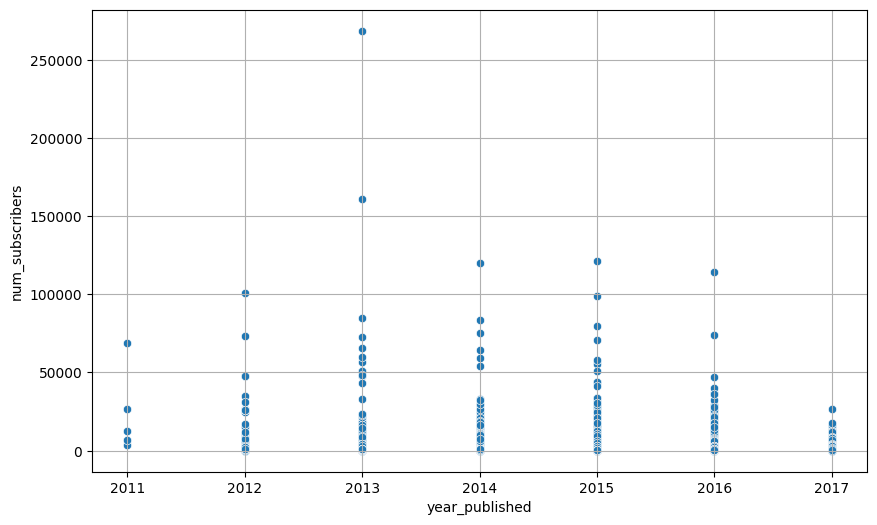

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year_published', y='num_subscribers', data=udemy_cursos)
plt.grid()

OBSERVACIONES: 
Es interesante ver cómo los subscriptores estaban bajando respecto al tiempo para el 2017 ya estaban con menos de 50 mil 

In [40]:
#Calcular tasa de conversión
def graficar_tasa_conversion(var_predictora, var_predecir, type='line', orden=None):
    x, y = var_predictora, var_predecir

#Generar agrupaciones (groupby), calcular tasa de conversión(mean) y multiplicar *100
    grupo = udemy_cursos.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

#Generar Gráfica
    if type == 'line':
     plt.figure(figsize=(10,6))
     sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
     plt.grid()
    elif type == 'bar':
     plt.figure(figsize=(14,6))
     sns.barplot(x=var_predictora, y='tasa_conv', data=grupo)
     plt.grid()
    elif type == 'scatter':
     plt.figure(figsize=(10,6))
     sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
     plt.grid()

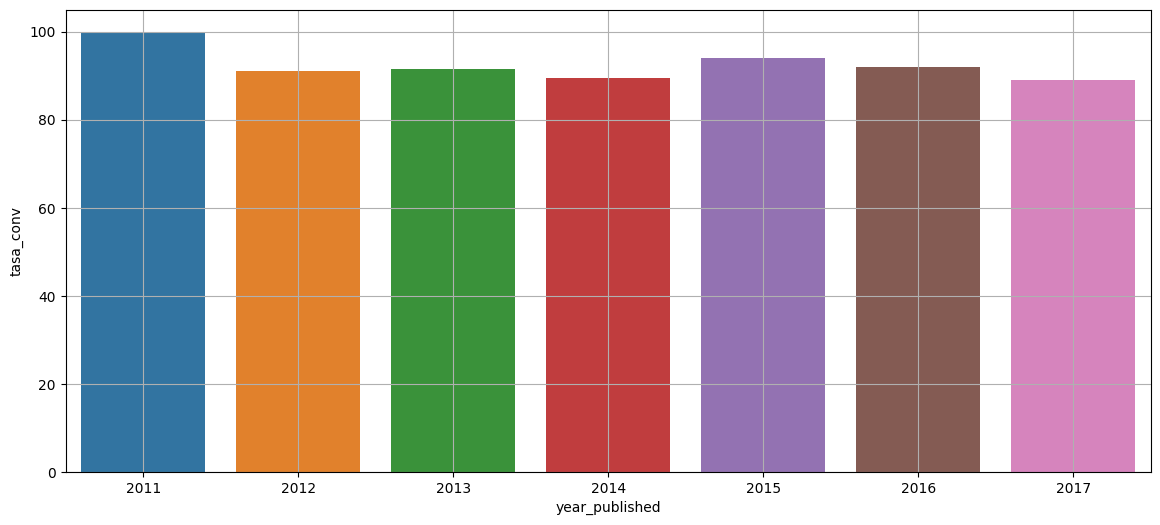

In [41]:
#Graficar la tasa de conversión por año
graficar_tasa_conversion('year_published', 'y_bin', type='bar')

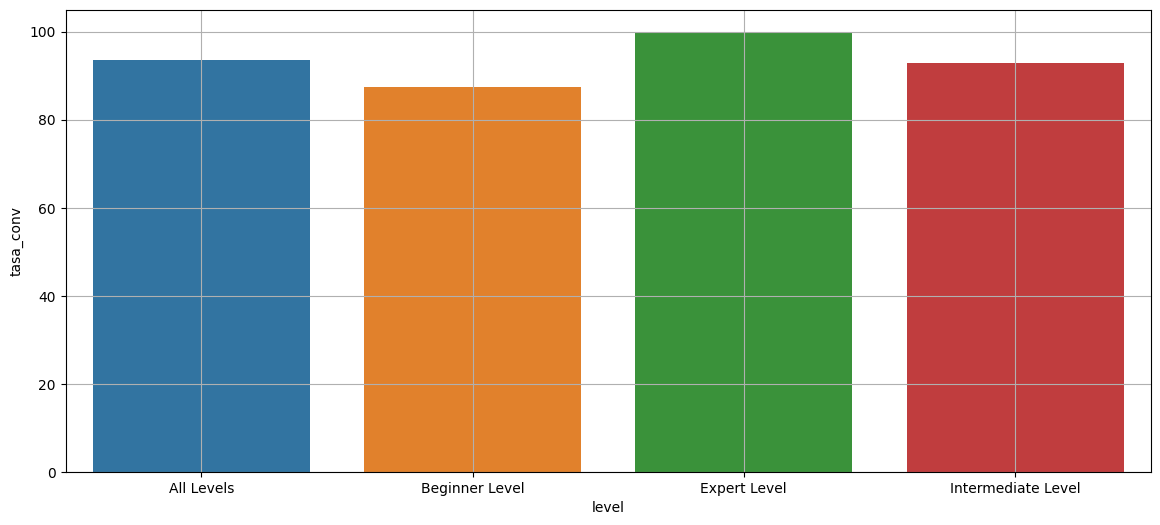

In [42]:
#Graficar la tasa de conversión por nivel
graficar_tasa_conversion('level', 'y_bin', type='bar')

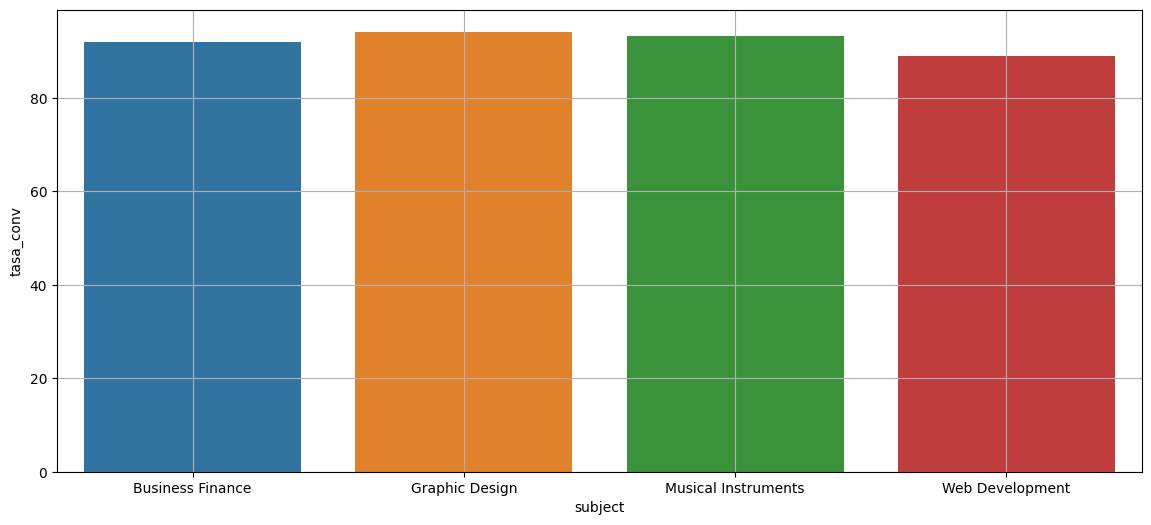

In [43]:
#Graficar la tasa de conversión por materia
graficar_tasa_conversion('subject', 'y_bin', type='bar')

OBSERVACIONES:
- La tasa de conversión es alta más del 80% de manera general, sin embargo ha bajado con los años, habrá que analizarlo al graficarlo en power bi
-------------------------------------------------------------------------------------------------


*** **NUBE DE PALABRAS**

In [56]:
udemy_cursos.sample()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_time,year_published
252,1117834,Learn How To Trade Gold In 2017,True,200,2,1,16,All Levels,1.0,Business Finance,2017-04-06,2017


In [58]:
# Importamos esta libreria que nos permite reemplazar caracteres
from nltk.corpus import wordnet
import nltk
import re

#Todo este código permitirá limpiar el título y evitar palabras repetitivas
titular_list_3=[]
for titular in udemy_cursos.course_title:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Eliminamos las palabras que no queremos estén presentes en la nube de palabras
    titular = [palabra for palabra in titular if len(palabra)>3]
    titular = [palabra for palabra in titular if palabra != 'course']
    titular = [palabra for palabra in titular if palabra != 'curso']
    titular = [palabra for palabra in titular if palabra != 'courses']
    titular = [palabra for palabra in titular if palabra != 'good']
    titular = [palabra for palabra in titular if palabra != 'one']
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    titular_list_3.append(titular)

In [59]:
#Observen el cambio
udemy_cursos["title_stem"] = titular_list_3
udemy_cursos.sample(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_time,year_published,title_stem
790,355622,Trade Forex 13 Patterns - Golden Ratios Secret...,True,200,554,63,44,All Levels,4.00,Business Finance,2015-01-10,2015,trade forex patterns golden ratios secret reve...
96,959144,Practical Accounts APP Overview,True,20,1361,1,14,Intermediate Level,3.00,Business Finance,2016-10-04,2016,practical accounts overview
2901,696016,HTML CSS Easy steps to create a web template f...,True,200,11574,78,15,Beginner Level,1.00,Web Development,2015-12-14,2015,html easy steps create template from scratch
3044,1022682,PHP Laravel 5:Creating a CRUD application,True,45,511,12,7,All Levels,0.55,Web Development,2016-11-28,2016,laravel creating crud application
1762,395652,R Graph Essentials,True,85,105,4,41,All Levels,2.00,Graphic Design,2015-01-21,2015,graph essentials


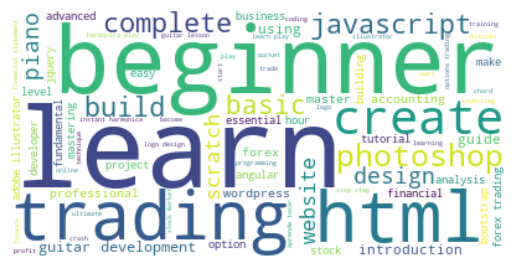

In [60]:
text = " ".join(review for review in udemy_cursos.title_stem)
stopwords = set(STOPWORDS)

# Genera la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Se genera la imagen que la va a contener:
# se usa matplotlib:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Guardando los archivos limpios en formato CSV

In [51]:
#Preparando los datos para csv
#udemy_cursos.to_csv('emp_udemy_cursos.csv', index=False, encoding='utf-8')

**OBSERVACIONES FINALES**
Así cómo los datasets tienen datos interesantes también hay datos faltantes, sobre todo en este dataset, tiene tanta información pero llega hasta el 2017 y los acontecimientos ocurridos a partir del 2019, seguramente modificaron los resultados a los que hemos estado llegando con el análisis, sobre todo para la cantidad de subscriptores por año.

Hay una tendencia clara en la que prefieren realizar el pago cuando el curso está dentro de los 20-50usd, a menos que el curso sea nivel experto.

Al ser una plataforma en la que creadores de contenido imparten sus cursos y no una institución reconocida, cómo lo hemos estado viendo con la otra plataforma, en la nube de palabras si bien está presente cómo hasta ahora los cursos orientados a programación. También, encontramos temas que más bien podrían ser un hobbie, cómo lo es photoshop, diseño, piano, guitarra, entre otros. Aún así, no deja de ser una plataforma que cuenta con instructores muy capacitados en lo que hacen, cómo en mi caso, que comence el mundo de la programación a través de esta plataforma, dedicándole 4 horas al día. 

Otro punto a considerar, es que no hay una gran cantidad de videos gratuitos, ya que, los creadores de contenido, reciben un pago, por inscripciones a sus cursos, esto hace que no sea tan accesible para todos los sectores.